# Importimised

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
#!pip install pandas openpyxl

In [3]:
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000


# sisselugemised

In [4]:
#excel file 1
EEB_samples = pd.ExcelFile('EEB_samples.xlsx') #file

sample = EEB_samples.parse('full_table') #sheet name
#samples_reynoutria = EEB_samples.parse('reynoutria') 
#samples_solidago = EEB_samples.parse('solidago') 

#excel file 2
EEB_soil_chemistry = pd.ExcelFile('EEB_soil_chemistry.xlsx')

soil = EEB_soil_chemistry.parse('Sheet1')

#excel file 3
plant_survey = pd.ExcelFile('Plant_survey_2023_final.xlsx') 

plant = plant_survey.parse('Sheet1')

### eemaldame soil failist ühikute rea

In [5]:
soil=soil.iloc[1:] #eemaldasin ühikute rea
soil= soil.reset_index(drop=True)

# asjalik

In [6]:
#plant['liigirikkus'] = plant.apply(lambda row: (row != 0).sum(), axis=1)

In [7]:
#plt.plot(plant.liigirikkus,plant.Reynoutria_japonica,'mo')
#plt.plot(plant.liigirikkus,plant.Solidago_canadensis,'co')
#plt.title('Liigirikkus vs invasiivse liigi katvus')
#plt.show()

# keskmised

 - 123 inv
 - 456trans
 - 789nat

EEB-RJ1-1  

RJ taga indeks on 1 kuni 13


EEB-SC1-1

SC taga indeks 1 kuni 11


viimane indeks 1-9 kõigil

In [8]:
#muudame nimesid
for i in range (1,14):
    for j in range(1,10):
        plant[plant['sample']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'INV-{}-R'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'TRANS-{}-R'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-RJ{}-{}'.format(i, j), 'sample'] = 'NAT-{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        plant[plant['sample']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'INV-{}-S'.format(i)
        if j in range(4, 7): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'TRANS-{}-S'.format(i)
        if j in range(7, 10): 
            plant.loc[plant['sample'] == 'EEB-SC{}-{}'.format(i, j), 'sample'] = 'NAT-{}-S'.format(i)

In [9]:
mean_df = plant.groupby('sample').mean()

In [10]:
taimed=mean_df.copy()

# ......

In [11]:
sample.columns

Index(['new_code', 'project', 'plant_sp', 'sampling_area(on_bag)', 'treatment',
       'sampling_area_nr', 'gradient', 'grad_nr', 'plant_nr', 'expert', 'area',
       'lat', 'lon', 'status _dna_extraction'],
      dtype='object')

In [12]:
#koordinaatide dataframe
koord_df=sample[['new_code','lat', 'lon']]
koord_df

,new_code,lat,lon
0,EEB-RJ1-1,58.858114,26.931854
1,EEB-RJ1-2,58.858114,26.931854
2,EEB-RJ1-3,58.858114,26.931854
3,EEB-RJ1-4,58.858114,26.931854
4,EEB-RJ1-5,58.858114,26.931854
...,...,...,...
211,EEB-SC11-5,58.060173,22.207555
212,EEB-SC11-6,58.060173,22.207555
213,EEB-SC11-7,58.060173,22.207555
214,EEB-SC11-8,58.060173,22.207555


In [13]:
# vahetame koordinaatide dataframes ka nimesid
#muudame nimesid
for i in range (1,14):
    for j in range(1,10):
        koord_df[koord_df['new_code']=='EEB-RJ{}-{}'.format(i, j)]
        if j in range(1, 4):
            koord_df.loc[koord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'INV-{}-R'.format(i)
        if j in range(4, 7): 
            koord_df.loc[koord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'TRANS-{}-R'.format(i)
        if j in range(7, 10): 
            koord_df.loc[koord_df['new_code'] == 'EEB-RJ{}-{}'.format(i, j), 'new_code'] = 'NAT-{}-R'.format(i)
            
            
for i in range (1,12):
    for j in range(1,10):
        koord_df[koord_df['new_code']=='EEB-SC{}-{}'.format(i, j)]
        if j in range(1, 4):
            koord_df.loc[koord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'INV-{}-S'.format(i)
        if j in range(4, 7): 
            koord_df.loc[koord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'TRANS-{}-S'.format(i)
        if j in range(7, 10): 
            koord_df.loc[koord_df['new_code'] == 'EEB-SC{}-{}'.format(i, j), 'new_code'] = 'NAT-{}-S'.format(i)

In [14]:
koord_df

,new_code,lat,lon
0,INV-1-R,58.858114,26.931854
1,INV-1-R,58.858114,26.931854
2,INV-1-R,58.858114,26.931854
3,TRANS-1-R,58.858114,26.931854
4,TRANS-1-R,58.858114,26.931854
...,...,...,...
211,TRANS-11-S,58.060173,22.207555
212,TRANS-11-S,58.060173,22.207555
213,NAT-11-S,58.060173,22.207555
214,NAT-11-S,58.060173,22.207555


In [15]:
koord=koord_df.groupby('new_code').mean()

In [16]:
koord

,lat,lon
new_code,,
INV-1-R,58.858114,26.931854
INV-1-S,58.777722,26.309980
INV-10-R,58.278045,22.500830
INV-10-S,58.255485,22.473204
INV-11-R,58.259786,22.512229
...,...,...
TRANS-7-S,59.385577,24.728316
TRANS-8-R,59.434088,24.685018
TRANS-8-S,59.434088,24.685018


# ---------

In [17]:

kogu_katvus=mean_df.T.sum()
kogu_katvus

sample
INV-1-R      105.166667
INV-1-S       91.666667
INV-10-R      77.000000
INV-10-S      96.333333
INV-11-R      99.333333
                ...    
TRANS-7-S     87.000000
TRANS-8-R     73.333333
TRANS-8-S     88.000000
TRANS-9-R    119.333333
TRANS-9-S     32.000000
Length: 72, dtype: float64

In [18]:
invasiivsed=mean_df[['Reynoutria_japonica', 'Solidago_canadensis']]
invasiivsed

,Reynoutria_japonica,Solidago_canadensis
sample,,
INV-1-R,86.666667,0.000000
INV-1-S,0.000000,0.000000
INV-10-R,71.666667,0.000000
INV-10-S,0.000000,87.333333
INV-11-R,91.666667,0.000000
...,...,...
TRANS-7-S,0.000000,25.000000
TRANS-8-R,25.000000,0.000000
TRANS-8-S,0.000000,30.000000


In [19]:
tavalised=mean_df.drop(['Reynoutria_japonica', 'Solidago_canadensis'],axis=1)
tavaliste_katvus=tavalised.T.sum()


In [20]:
invasiivsete_katvus=invasiivsed.T.sum()
invasiivsete_katvus

sample
INV-1-R      86.666667
INV-1-S       0.000000
INV-10-R     71.666667
INV-10-S     87.333333
INV-11-R     91.666667
               ...    
TRANS-7-S    25.000000
TRANS-8-R    25.000000
TRANS-8-S    30.000000
TRANS-9-R    25.000000
TRANS-9-S    11.333333
Length: 72, dtype: float64

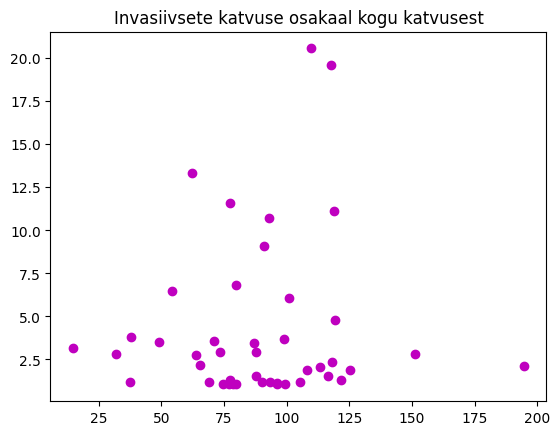

In [21]:
plt.plot(kogu_katvus,kogu_katvus/invasiivsete_katvus,'mo')
plt.title('Invasiivsete katvuse osakaal kogu katvusest')
plt.show()

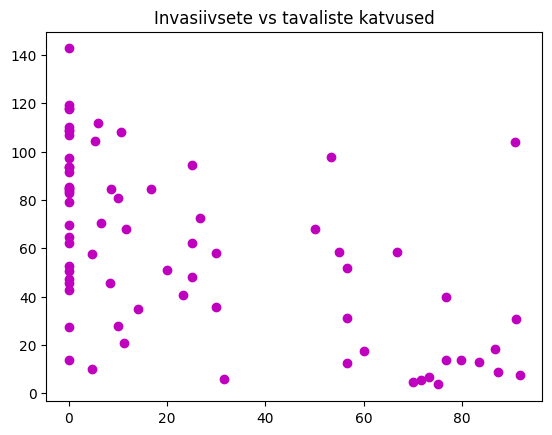

In [22]:
plt.plot(invasiivsete_katvus,tavaliste_katvus,'mo')
plt.title('Invasiivsete vs tavaliste katvused')
plt.show()

In [144]:
#mean_df=mean_df.T
distances = pairwise_distances(mean_df.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df = pd.DataFrame(distances, index=mean_df.index, columns=mean_df.index)
distances_df

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,106.094063,24.186205,124.668518,17.352254,126.509668,81.529025,21.245453,36.651749,118.014082,...,86.448009,97.447193,82.536068,99.719145,69.388692,96.196599,64.233498,94.569440,91.086671,92.558118
INV-1-S,106.094063,0.000000,94.077899,105.633397,109.390685,107.207372,140.480515,95.675238,84.041753,96.717520,...,76.299920,61.567952,66.404906,72.408539,66.323948,61.953872,63.335667,67.021075,98.054523,56.343744
INV-10-R,24.186205,94.077899,0.000000,113.063411,20.305995,117.151909,101.603075,6.491294,18.723873,107.827929,...,85.418242,82.046409,75.632471,84.906694,61.022865,80.478552,50.663689,85.400409,97.234572,76.163661
INV-10-S,124.668518,105.633397,113.063411,0.000000,126.676764,16.318029,160.748378,115.270204,104.880499,118.565337,...,106.866869,66.633625,97.935518,92.104706,95.289786,66.784306,92.638366,66.748267,124.604766,78.499864
INV-11-R,17.352254,109.390685,20.305995,126.676764,0.000000,129.967641,97.158372,17.179767,36.884580,121.616790,...,98.736840,99.677013,91.418133,102.178238,77.696933,98.331724,68.862512,101.716569,106.114217,94.775262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,96.196599,61.953872,80.478552,66.784306,98.331724,70.269756,139.597407,82.695788,68.401919,85.040098,...,69.068631,23.608613,53.932227,49.529391,51.558176,0.000000,44.957017,36.799910,95.275059,21.852049
TRANS-8-R,64.233498,63.335667,50.663689,92.638366,68.862512,95.157974,109.705975,53.462262,39.206944,83.727689,...,50.436817,48.250299,37.376445,54.124418,24.995529,44.957017,0.000000,46.273763,73.269166,35.798703
TRANS-8-S,94.569440,67.021075,85.400409,66.748267,101.716569,64.889381,119.676365,87.234111,74.051479,86.991792,...,45.946721,39.703032,40.616697,59.120561,42.498669,36.799910,46.273763,0.000000,69.469681,38.072873


C:\Anaconda\envs\IDS\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


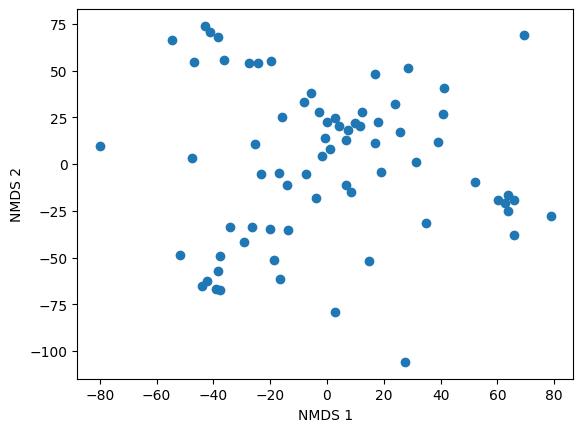

In [24]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(distances_df)

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.show()

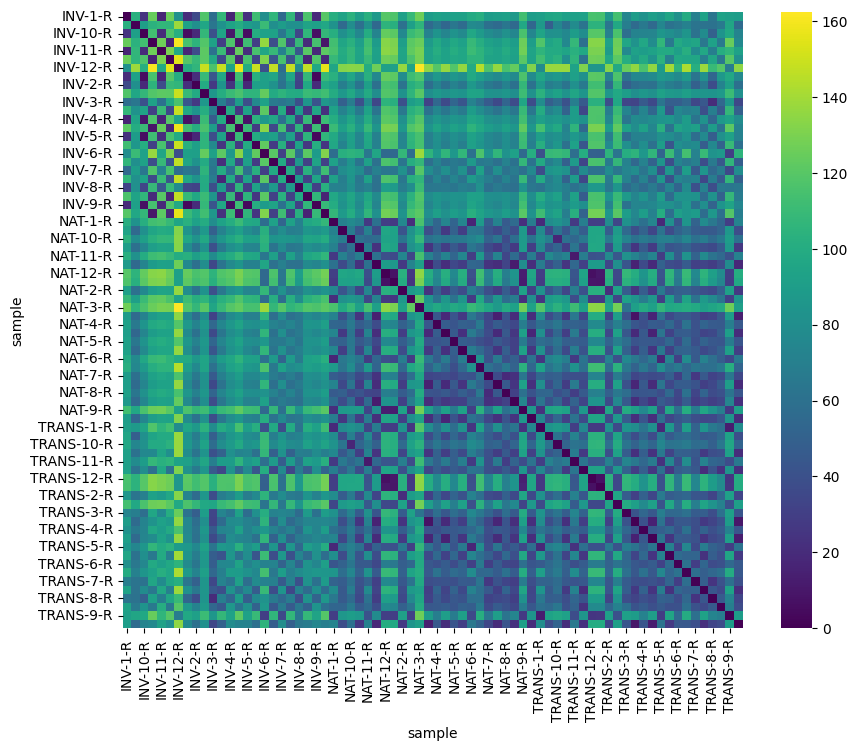

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distances_df' is your DataFrame with the pairwise distances
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df, cmap='viridis')
plt.show()

In [26]:
distances1 = pairwise_distances(invasiivsed.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df1 = pd.DataFrame(distances1, index=invasiivsed.index, columns=invasiivsed.index)
distances_df1

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,86.666667,15.000000,123.037483,5.000000,125.666667,4.000000,11.666667,30.000000,86.666667,...,75.000000,90.676470,76.666667,86.922699,66.666667,90.200394,61.666667,91.712110,61.666667,87.404551
INV-1-S,86.666667,0.000000,71.666667,87.333333,91.666667,91.000000,90.666667,75.000000,56.666667,0.000000,...,11.666667,26.666667,10.000000,6.666667,20.000000,25.000000,25.000000,30.000000,25.000000,11.333333
INV-10-R,15.000000,71.666667,0.000000,112.974432,20.000000,115.832254,19.000000,3.333333,15.000000,71.666667,...,60.000000,76.467132,61.666667,71.976076,51.666667,75.901984,46.666667,77.692413,46.666667,72.557257
INV-10-S,123.037483,87.333333,112.974432,0.000000,126.609197,3.666667,125.887075,115.117814,104.106783,87.333333,...,88.109149,60.666667,87.903988,80.666667,89.594147,62.333333,90.841131,57.333333,90.841131,76.000000
INV-11-R,5.000000,91.666667,20.000000,126.609197,0.000000,129.165699,1.000000,16.666667,35.000000,91.666667,...,80.000000,95.466690,81.666667,91.908771,71.666667,95.014619,66.666667,96.450909,66.666667,92.364616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,90.200394,25.000000,75.901984,62.333333,95.014619,66.000000,94.050223,79.056942,61.936347,25.000000,...,27.588242,1.666667,26.925824,18.333333,32.015621,0.000000,35.355339,5.000000,35.355339,13.666667
TRANS-8-R,61.666667,25.000000,46.666667,90.841131,66.666667,94.371606,65.666667,50.000000,31.666667,25.000000,...,13.333333,36.552854,15.000000,25.873624,5.000000,35.355339,0.000000,39.051248,0.000000,27.448943
TRANS-8-S,91.712110,30.000000,77.692413,57.333333,96.450909,61.000000,95.501018,80.777472,64.117947,30.000000,...,32.188680,3.333333,31.622777,23.333333,36.055513,5.000000,39.051248,0.000000,39.051248,18.666667


In [27]:
distances2 = pairwise_distances(tavalised.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df2 = pd.DataFrame(distances2, index=tavalised.index, columns=tavalised.index)
distances_df2

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,54.912810,18.848077,19.166667,16.104692,8.281505,81.405194,17.030202,21.014545,79.036384,...,41.799787,30.188758,28.089638,47.362960,18.553975,25.133532,14.182344,16.577260,66.836658,18.706060
INV-1-S,54.912810,0.000000,55.583271,55.590267,55.086296,54.652945,104.351702,55.179002,56.354779,95.698891,...,73.449718,54.904462,63.903139,70.509653,59.270097,56.454997,55.938955,58.890199,92.220448,55.101422
INV-10-R,18.848077,55.583271,0.000000,2.027588,2.886751,14.375906,99.809819,4.678556,11.161690,79.810540,...,60.251095,24.378953,42.619766,43.888748,32.295511,17.738846,17.508728,32.523496,85.245397,7.164728
INV-10-S,19.166667,55.590267,2.027588,0.000000,3.620927,14.700718,99.881597,5.830952,11.691640,79.884987,...,60.326657,24.280765,42.746020,44.021459,32.400274,17.823206,17.416467,32.634338,85.277325,7.824463
INV-11-R,16.104692,55.086296,2.886751,3.620927,0.000000,11.958261,97.131640,4.027682,11.245987,79.415574,...,57.540083,24.404007,40.283716,43.895077,29.955523,17.785762,15.719768,29.935115,82.545610,7.078920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,25.133532,56.454997,17.738846,17.823206,17.785762,21.903830,101.196179,17.272329,20.017354,80.775753,...,62.160858,23.354752,45.645981,44.892464,36.640900,0.000000,25.484200,35.922757,86.823576,16.931233
TRANS-8-R,14.182344,55.938955,17.508728,17.416467,15.719768,12.124356,87.414085,17.919573,20.806650,79.875250,...,48.630980,30.459445,34.216630,47.526601,23.739325,25.484200,0.000000,24.301349,73.019023,18.941430
TRANS-8-S,16.577260,58.890199,32.523496,32.634338,29.935115,21.730675,70.737386,31.007168,33.825122,81.582610,...,32.229645,39.427853,25.139610,54.172564,19.621417,35.922757,24.301349,0.000000,56.368825,32.173143


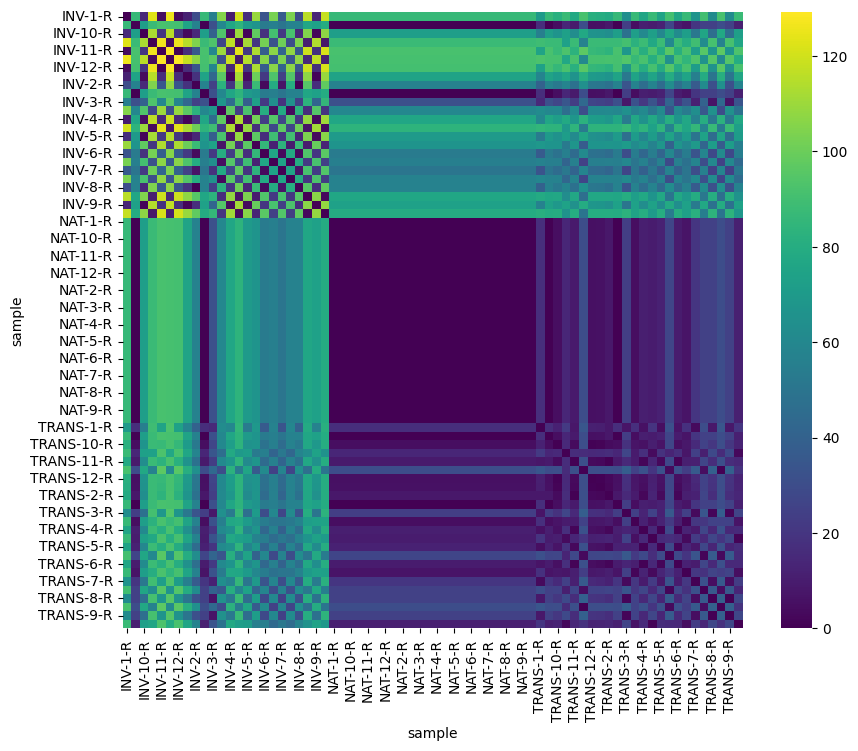

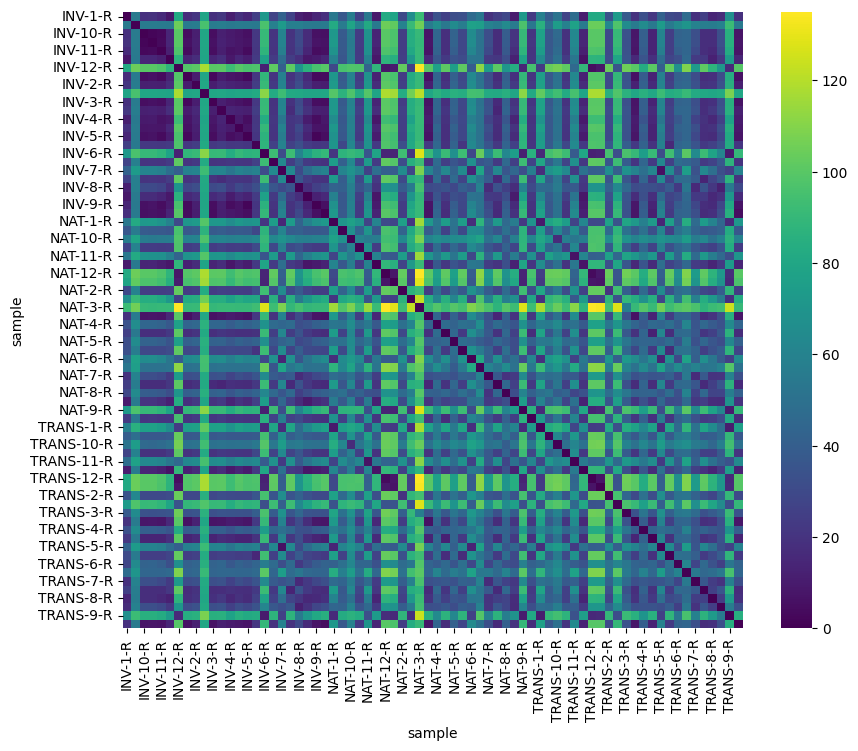

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df1, cmap='viridis')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(distances_df2, cmap='viridis')
plt.show()

# liigirikkus

In [29]:
mean_df['liigirikkus'] = mean_df.apply(lambda row: (row != 0).sum(), axis=1)


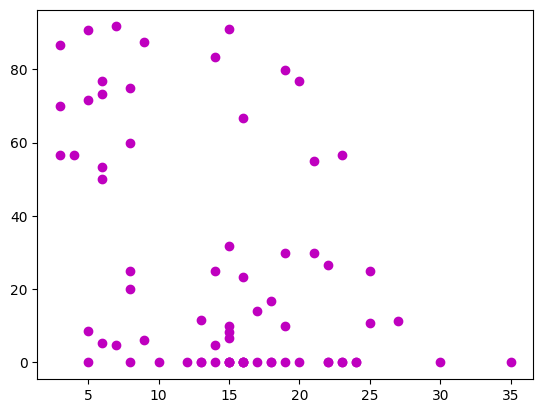

In [30]:
plt.plot(mean_df.liigirikkus,invasiivsete_katvus,'mo')
plt.show()

In [31]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Daucus_carota', 'Achillea_millefolia', 'Allium_scorodoprasum',
       'Veronica_teucrium', 'Agrimonia_eupatoria', 'Plantago_media',
       'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba', 'liigirikkus'],
      dtype='object', length=222)

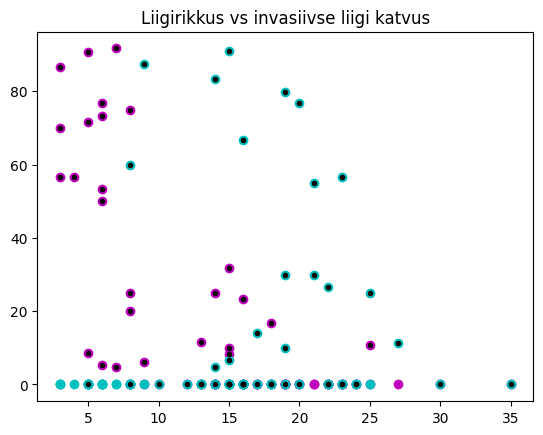

In [32]:
plt.plot(mean_df.liigirikkus,mean_df.Reynoutria_japonica,'mo')
plt.plot(mean_df.liigirikkus,mean_df.Solidago_canadensis,'co')
plt.plot(mean_df.liigirikkus,invasiivsete_katvus,'k.')
plt.title('Liigirikkus vs invasiivse liigi katvus')
plt.show()

# soil

In [33]:
soil.columns

Index(['ala_kood', 'Proovi nimetus', 'Nr.', 'Jrk. nr.', 'pHKCl', 'P-AL',
       'K-AL', 'Ca-AL', 'Mg-AL', 'N -Kjeldahl', 'C-Tjurin'],
      dtype='object')

In [34]:
soil_df=soil[['ala_kood','pHKCl']]
soil_df

,ala_kood,pHKCl
0,EEB-SC2,6.98
1,EEB-SC6,5.98
2,EEB-SC5,6.91
3,EEB-RJ4,6.68
4,EEB-RJ1,6.30
5,EEB-SC1,6.95
6,EEB-RJ3,6.39
7,EEB-SC8,5.62
8,EEB-RJ9,7.23
9,EEB-RJ8,6.46


In [35]:
soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(3)].pHKCl.values[0]

6.39

In [36]:
for index, row in mean_df.iterrows():
    for i in range(1,14):
        if '{}-R'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-RJ{}'.format(i)].pHKCl.values[0]
        if '{}-S'.format(i) in index:
            mean_df.loc[index, 'pH']=soil_df[soil_df['ala_kood']=='EEB-SC{}'.format(i)].pHKCl.values[0]

In [37]:
soil_df

,ala_kood,pHKCl
0,EEB-SC2,6.98
1,EEB-SC6,5.98
2,EEB-SC5,6.91
3,EEB-RJ4,6.68
4,EEB-RJ1,6.30
5,EEB-SC1,6.95
6,EEB-RJ3,6.39
7,EEB-SC8,5.62
8,EEB-RJ9,7.23
9,EEB-RJ8,6.46


In [38]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Achillea_millefolia,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,6.30
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30,6.95
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5,7.15
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9,7.11
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,7,7.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25,7.29
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14,6.46
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19,5.62


In [39]:
# for index, row in mean_df.iterrows():
#     if 'INV-' in index:
#         mean_df.loc[index, 'invadeeritus']='INV'
#     if 'TRANS-' in index:
#         mean_df.loc[index, 'invadeeritus']='TRANS'
#     if 'NAT-' in index:
#         mean_df.loc[index, 'invadeeritus']='NAT'

In [40]:
for index, row in mean_df.iterrows():
    if 'INV-' in index:
        mean_df.loc[index, 'invadeeritus']=1
    if 'TRANS-' in index:
        mean_df.loc[index, 'invadeeritus']=2
    if 'NAT-' in index:
        mean_df.loc[index, 'invadeeritus']=3

In [41]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,6.30,1.0
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30,6.95,1.0
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5,7.15,1.0
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9,7.11,1.0
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,7,7.16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25,7.29,2.0
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14,6.46,2.0
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19,5.62,2.0


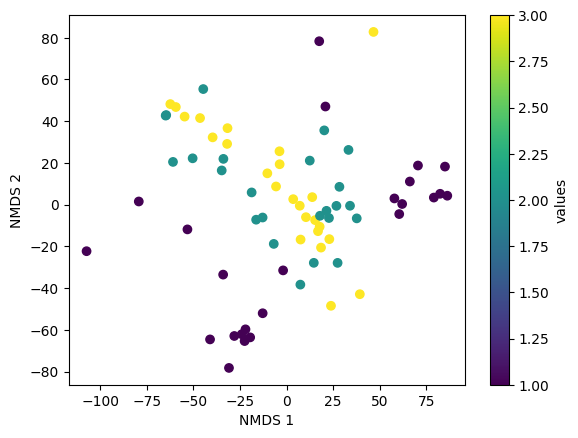

In [42]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto") #normalized_stress=False
embedding = mds.fit_transform(distances_df)
invadeeritus=mean_df.invadeeritus.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=invadeeritus, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')

plt.show()

- 1= INV
- 2=TRANS
- 3=NAT

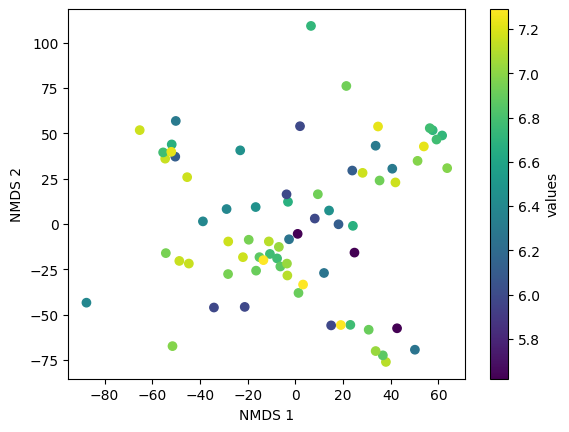

In [43]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto")
embedding = mds.fit_transform(distances_df)
pH=mean_df.pH.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=pH, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()
#stress valued vaadata???
# värvid panna invaded, mitte invaded, transitional

In [44]:
distances_df

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,0.000000,102.598868,24.088379,124.521417,16.863010,125.939249,81.503408,20.643132,36.628010,117.293909,...,85.861646,95.569783,81.650509,98.988916,69.200393,93.636561,63.276510,93.198265,90.939082,89.383848
INV-1-S,102.598868,0.000000,90.695155,103.524823,106.945209,106.150574,138.237919,93.111343,79.918535,95.698891,...,74.370506,61.037784,64.680840,70.824117,62.553533,61.742746,61.271255,66.091267,95.548998,56.254876
INV-10-R,24.088379,90.695155,0.000000,112.992625,20.207259,116.720940,101.602165,5.744563,18.697148,107.265248,...,85.030550,80.259302,74.961472,84.301707,60.929832,77.947276,49.843087,84.225227,97.183103,72.910143
INV-10-S,124.521417,103.524823,112.992625,0.000000,126.660965,15.151091,160.698130,115.265394,104.761236,118.358448,...,106.782619,65.345237,97.746270,91.896681,95.272708,64.831405,92.495646,65.970532,124.596683,76.401716
INV-11-R,16.863010,106.945209,20.207259,126.660965,0.000000,129.718070,97.136788,17.146428,36.762375,121.283186,...,98.543702,98.536513,91.061640,101.852835,77.675250,96.664943,68.494931,100.989548,106.104770,92.635486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,93.636561,61.742746,77.947276,64.831405,96.664943,69.539757,138.152492,80.921773,65.090749,84.556030,...,68.007965,23.414146,52.995807,48.491695,48.657533,0.000000,43.582616,36.269056,93.746111,21.758779
TRANS-8-R,63.276510,61.271255,49.843087,92.495646,68.494931,95.147254,109.331301,53.114133,37.890559,83.696210,...,50.425688,47.580341,37.360109,54.113050,24.260164,43.582616,0.000000,45.995169,73.019023,33.349996
TRANS-8-S,93.198265,66.091267,84.225227,65.970532,100.989548,64.755094,118.845371,86.524242,72.493103,86.923657,...,45.550643,39.568506,40.398020,58.983990,41.048752,36.269056,45.995169,0.000000,68.574372,37.196177


In [45]:
#tulbad

In [46]:
suur_tabel=pd.concat([mean_df,koord], axis=1)

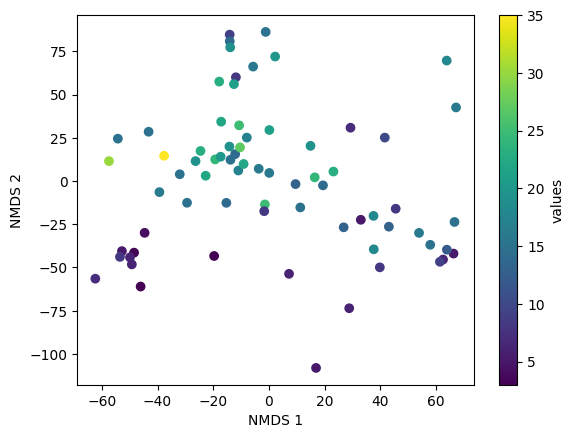

In [47]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress="auto")
embedding = mds.fit_transform(distances_df)
pH=suur_tabel.liigirikkus.values

plt.scatter(embedding[:, 0], embedding[:, 1],c=pH, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [48]:
#!pip install folium

In [49]:
sample

,new_code,project,plant_sp,sampling_area(on_bag),treatment,sampling_area_nr,gradient,grad_nr,plant_nr,expert,area,lat,lon,status _dna_extraction
0,EEB-RJ1-1,EEB,RJ,Mustvee,control,1,invaded,1,1,Kadri,E,58.858114,26.931854,NaN
1,EEB-RJ1-2,EEB,RJ,Mustvee,control,1,invaded,2,2,Kadri,E,58.858114,26.931854,NaN
2,EEB-RJ1-3,EEB,RJ,Mustvee,control,1,invaded,3,3,Kadri,E,58.858114,26.931854,NaN
3,EEB-RJ1-4,EEB,RJ,Mustvee,control,1,transitional,1,4,Kadri,E,58.858114,26.931854,NaN
4,EEB-RJ1-5,EEB,RJ,Mustvee,control,1,transitional,2,5,Kadri,E,58.858114,26.931854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,EEB-SC11-5,EEB,SC,Kaimri,mown,11,transitional,2,5,Oliver,W,58.060173,22.207555,NaN
212,EEB-SC11-6,EEB,SC,Kaimri,mown,11,transitional,3,6,Oliver,W,58.060173,22.207555,NaN
213,EEB-SC11-7,EEB,SC,Kaimri,mown,11,natural,1,7,Oliver,W,58.060173,22.207555,NaN
214,EEB-SC11-8,EEB,SC,Kaimri,mown,11,natural,2,8,Oliver,W,58.060173,22.207555,NaN


In [50]:
mean_df

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,6.30,1.0
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30,6.95,1.0
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,5,7.15,1.0
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,9,7.11,1.0
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0,7,7.16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25,7.29,2.0
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14,6.46,2.0
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19,5.62,2.0


In [51]:
koord.columns

Index(['lat', 'lon'], dtype='object')

In [52]:
koord

,lat,lon
new_code,,
INV-1-R,58.858114,26.931854
INV-1-S,58.777722,26.309980
INV-10-R,58.278045,22.500830
INV-10-S,58.255485,22.473204
INV-11-R,58.259786,22.512229
...,...,...
TRANS-7-S,59.385577,24.728316
TRANS-8-R,59.434088,24.685018
TRANS-8-S,59.434088,24.685018


In [53]:
import folium

# Create a map centered at an initial location
initial_latitude=58.595272
initial_longitude=25.013607
map = folium.Map(location=[initial_latitude, initial_longitude], zoom_start=7)

# Add points to the map
for index, row in koord.iterrows():
    folium.Marker([row['lat'], row['lon']]).add_to(map)

# Display the map
map

In [54]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Allium_scorodoprasum', 'Veronica_teucrium', 'Agrimonia_eupatoria',
       'Plantago_media', 'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba',
       'liigirikkus', 'pH', 'invadeeritus'],
      dtype='object', length=224)

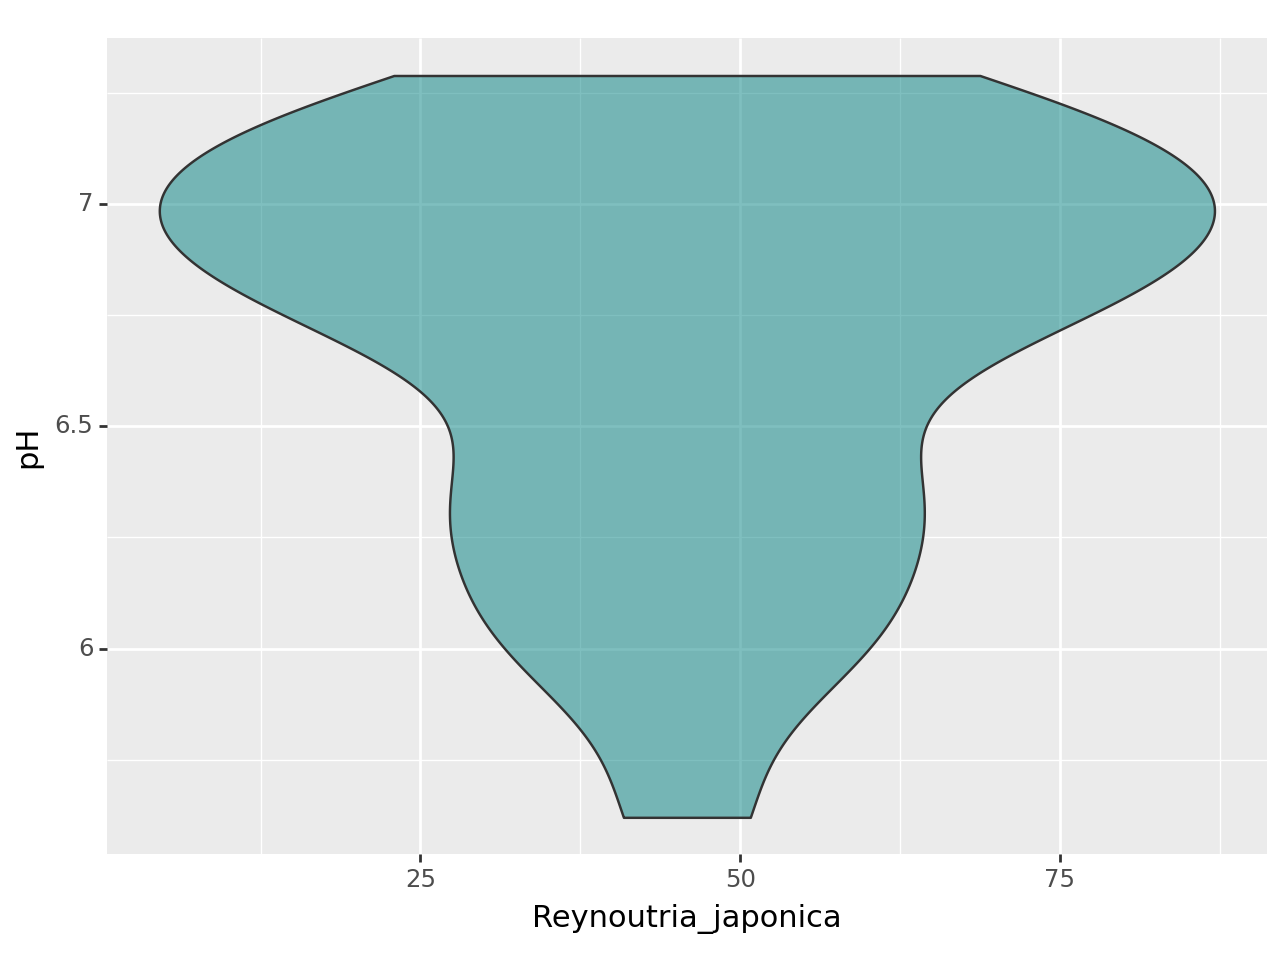

<Figure Size: (640 x 480)>

In [55]:
import plotnine as p9

(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(x = 'Reynoutria_japonica', y = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


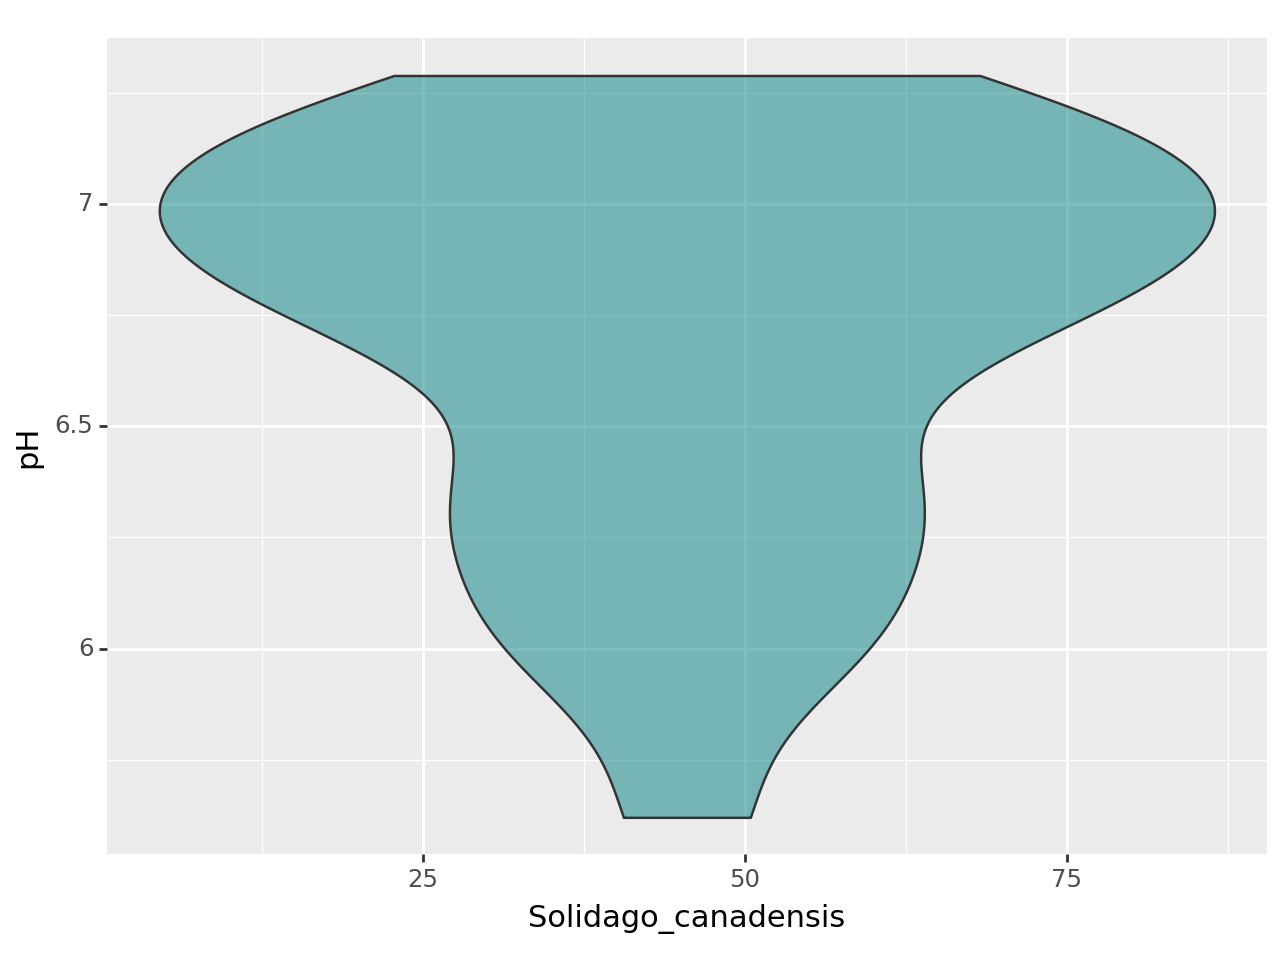

<Figure Size: (640 x 480)>

In [56]:
(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(x = 'Solidago_canadensis', y = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


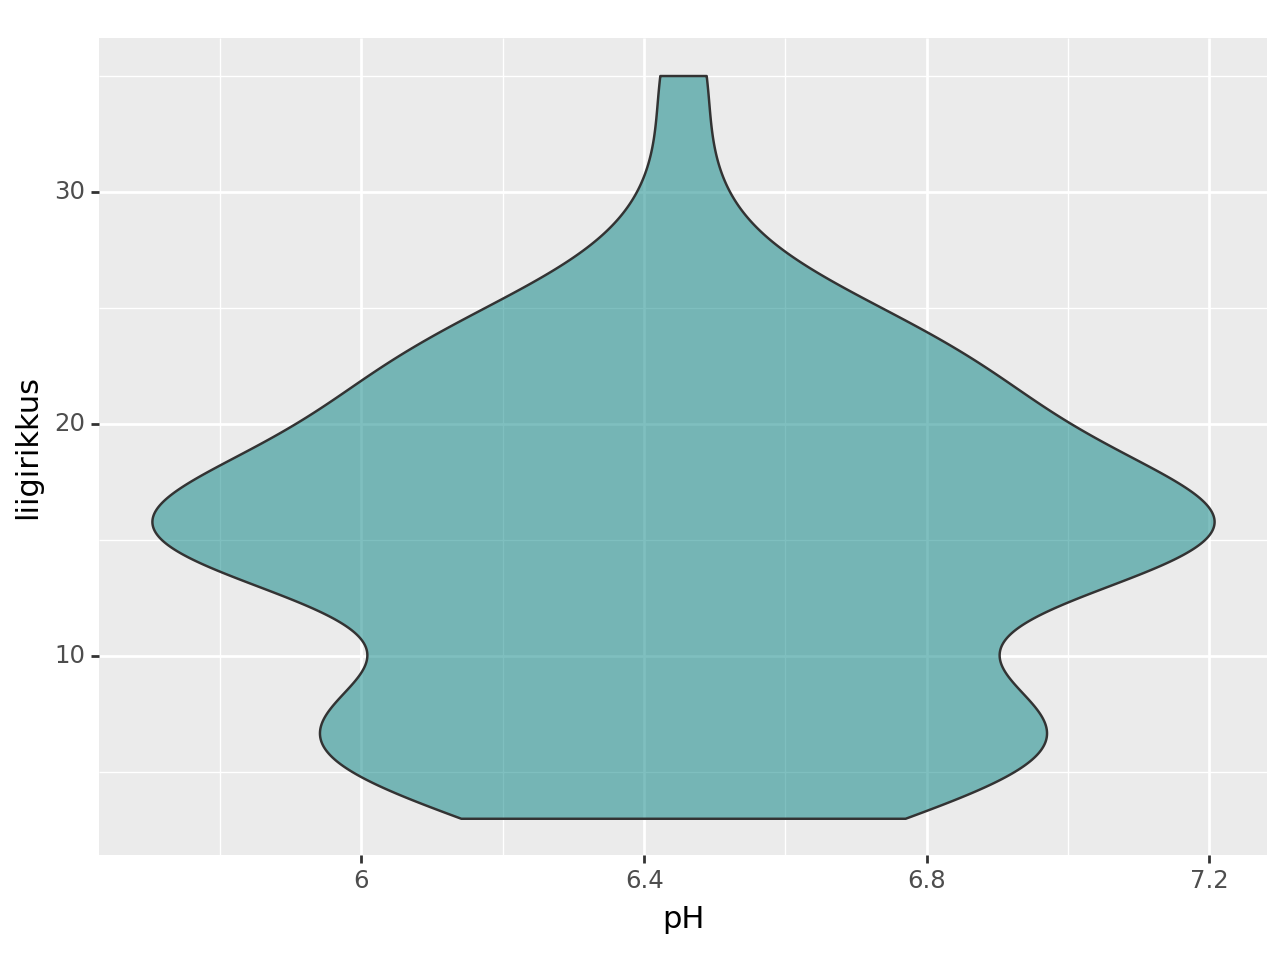

<Figure Size: (640 x 480)>

In [57]:
(p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'liigirikkus', x = 'pH')
) + 
    p9.geom_violin(fill='teal',alpha=0.5))


C:\Anaconda\envs\IDS\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


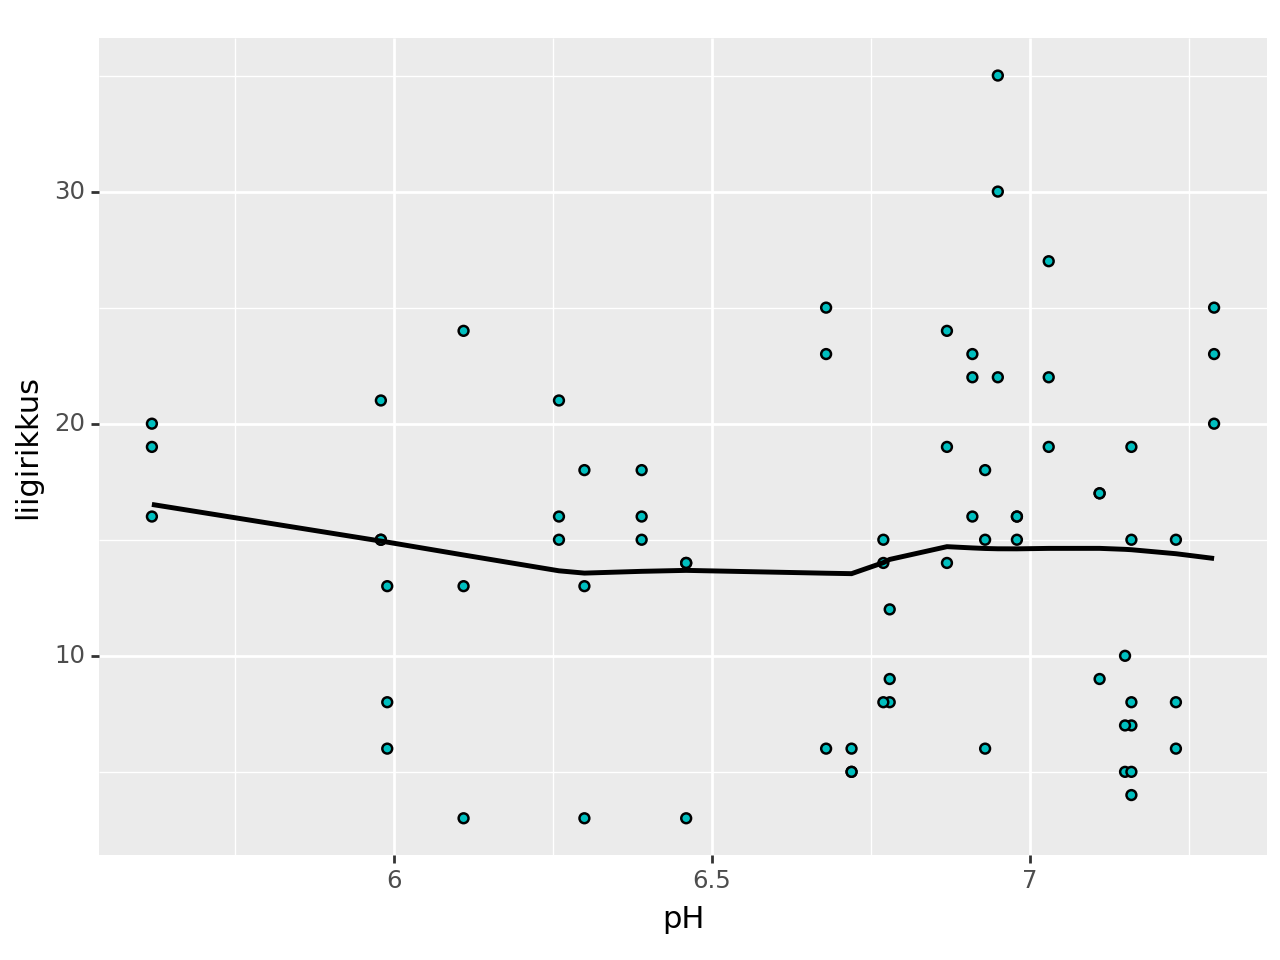

<Figure Size: (640 x 480)>

In [58]:
(
p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'liigirikkus', x = 'pH')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

C:\Anaconda\envs\IDS\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


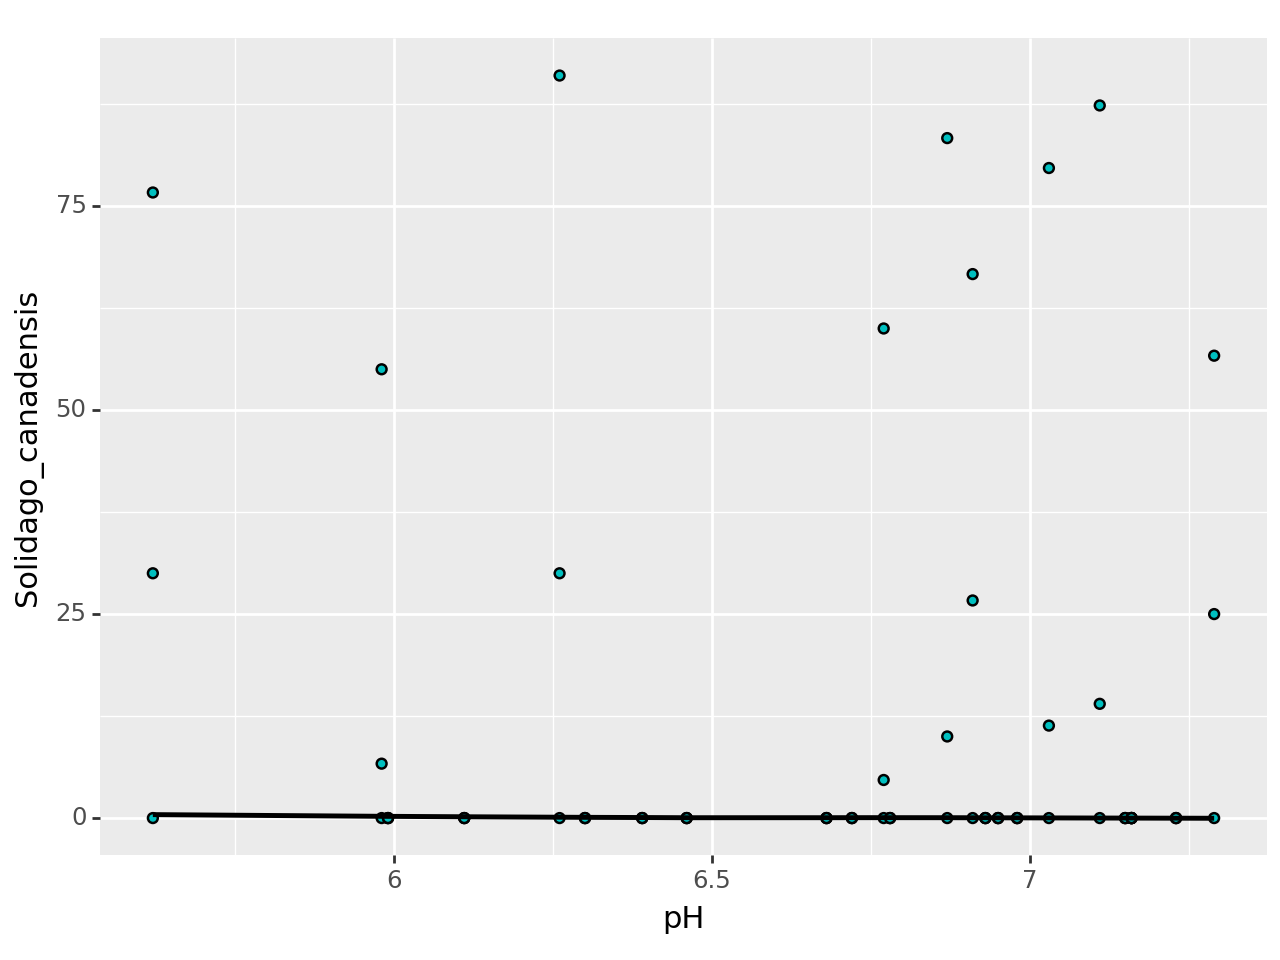

<Figure Size: (640 x 480)>

In [59]:
(
p9.ggplot(
    data = mean_df, 
    mapping = p9.aes(y = 'Solidago_canadensis', x = 'pH')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

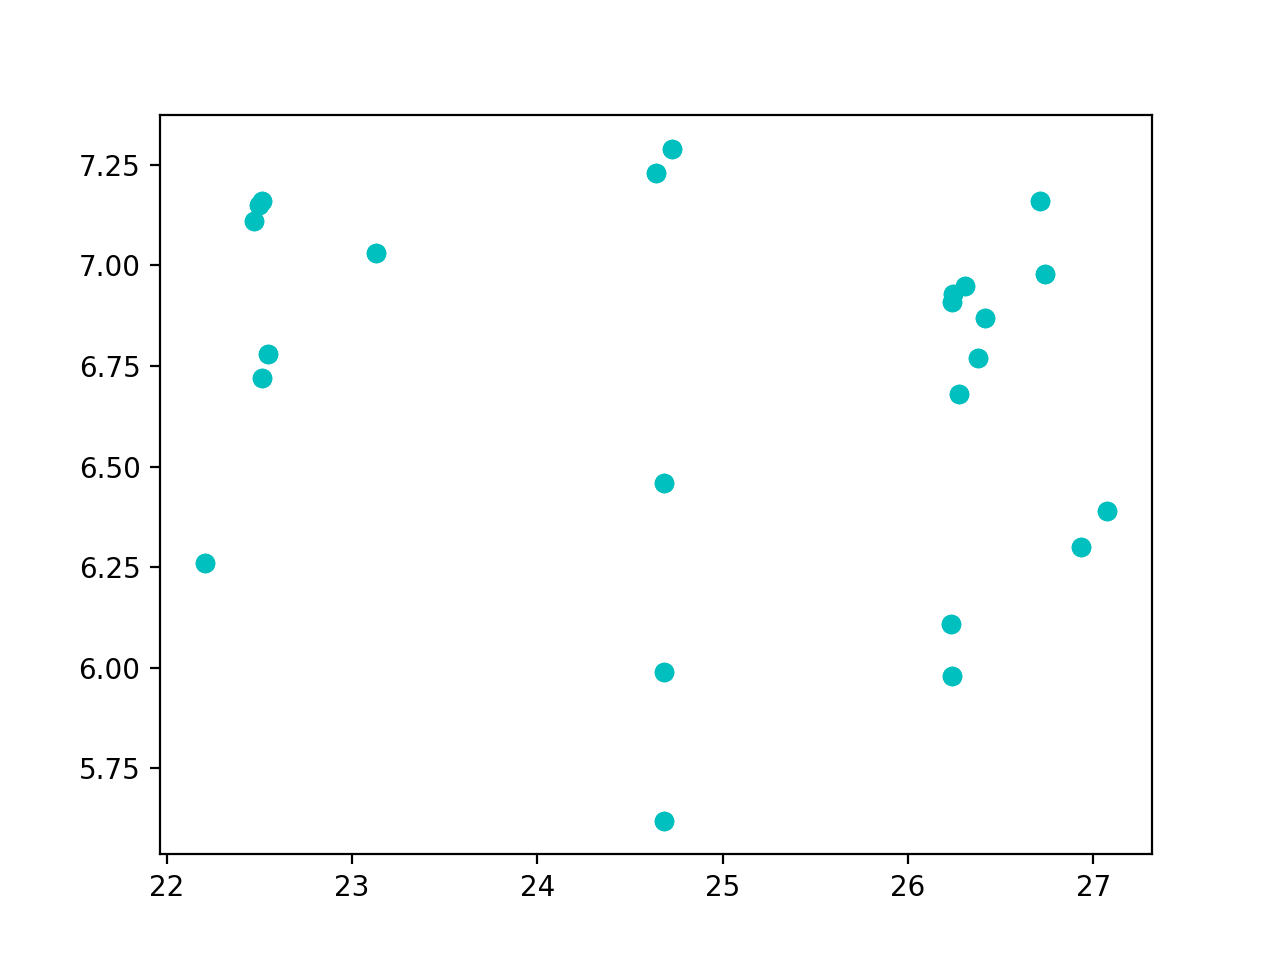

In [60]:
plt.plot(koord.lon,mean_df.pH,'co')
plt.show()

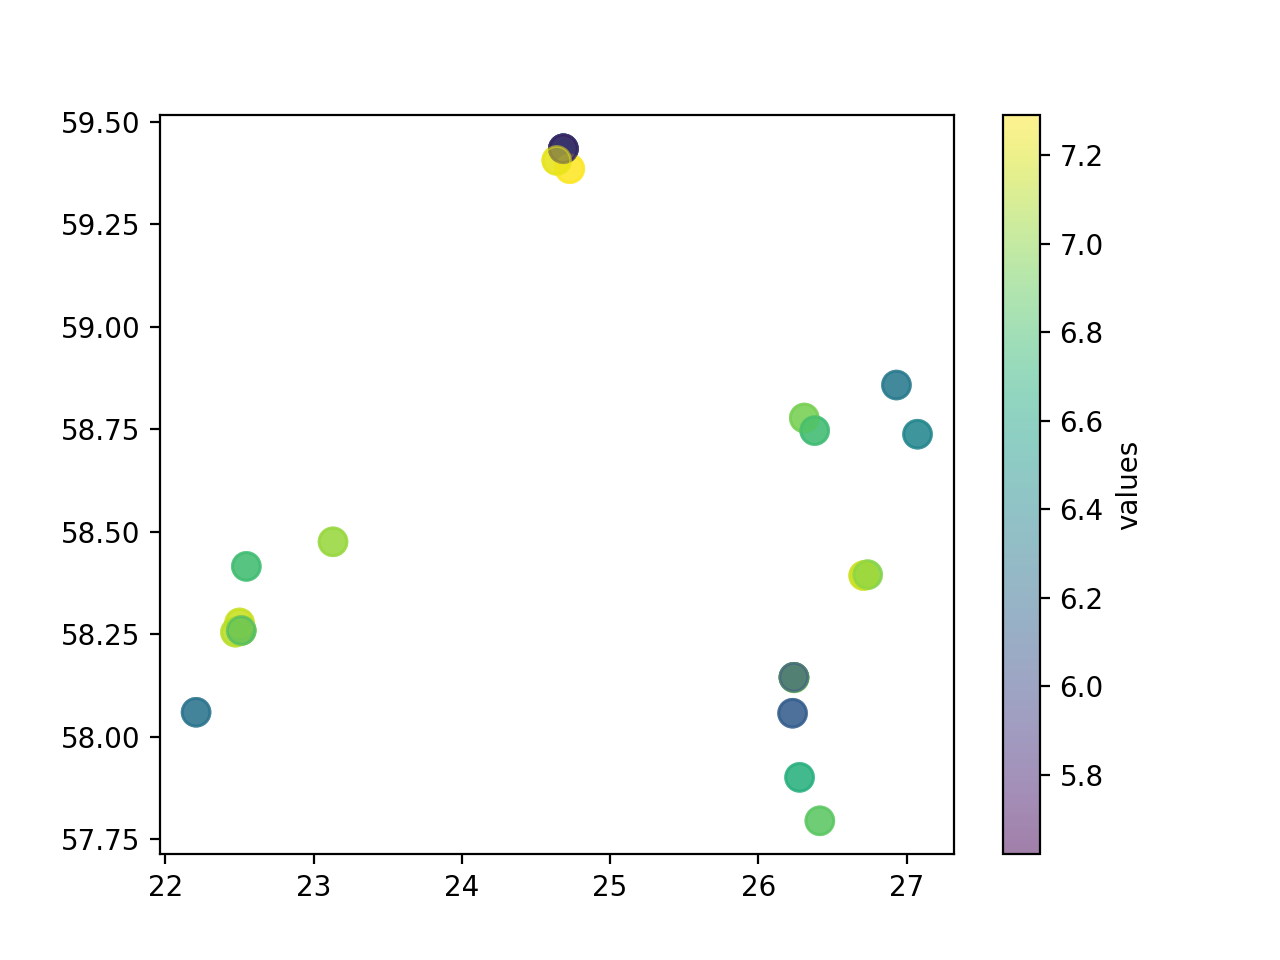

In [61]:
plt.scatter(koord.lon,koord.lat,c=mean_df.pH, cmap='viridis',s=100, alpha=0.5)
plt.colorbar(label='values')
plt.show()

In [62]:
mean_df.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'Allium_scorodoprasum', 'Veronica_teucrium', 'Agrimonia_eupatoria',
       'Plantago_media', 'Sonchus_arvensis', 'Prunus_domestica', 'Salix_alba',
       'liigirikkus', 'pH', 'invadeeritus'],
      dtype='object', length=224)

In [63]:
suur_tabel

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba,liigirikkus,pH,invadeeritus,lat,lon
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,3,6.30,1.0,58.858114,26.931854
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,30,6.95,1.0,58.777722,26.309980
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,5,7.15,1.0,58.278045,22.500830
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,9,7.11,1.0,58.255485,22.473204
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.0,0.333333,0.0,7,7.16,1.0,58.259786,22.512229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,25,7.29,2.0,59.385577,24.728316
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,14,6.46,2.0,59.434088,24.685018
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,19,5.62,2.0,59.434088,24.685018
TRANS-9-R,25.000000,0.000000,85.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,8,7.23,2.0,59.405796,24.640119


# lisame suurde tabelisse soil failist asju, pH lisatud enne

In [64]:
soil.rename(columns={'P-AL': 'P_AL', 'K-AL': 'K_AL', 'Ca-AL': 'Ca_AL', 'Mg-AL': 'Mg_AL', 'N -Kjeldahl': 'N_Kjel', 'C-Tjurin': 'C_Tjur'}, inplace=True)

In [65]:
soil.columns

Index(['ala_kood', 'Proovi nimetus', 'Nr.', 'Jrk. nr.', 'pHKCl', 'P_AL',
       'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur'],
      dtype='object')

In [66]:

for index, row in suur_tabel.iterrows():
    for i in range(1,14):
        if '{}-R'.format(i) in index:
            suur_tabel.loc[index, 'P_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].P_AL.values[0]
            suur_tabel.loc[index, 'K_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].K_AL.values[0]
            suur_tabel.loc[index, 'Ca_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].Ca_AL.values[0]
            suur_tabel.loc[index, 'Mg_AL']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].Mg_AL.values[0]
            suur_tabel.loc[index, 'N_Kjel']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].N_Kjel.values[0]
            suur_tabel.loc[index, 'C_Tjur']=soil[soil['ala_kood']=='EEB-RJ{}'.format(i)].C_Tjur.values[0]
        if '{}-S'.format(i) in index:
            suur_tabel.loc[index, 'P_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].P_AL.values[0]
            suur_tabel.loc[index, 'K_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].K_AL.values[0]
            suur_tabel.loc[index, 'Ca_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].Ca_AL.values[0]
            suur_tabel.loc[index, 'Mg_AL']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].Mg_AL.values[0]
            suur_tabel.loc[index, 'N_Kjel']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].N_Kjel.values[0]
            suur_tabel.loc[index, 'C_Tjur']=soil[soil['ala_kood']=='EEB-SC{}'.format(i)].C_Tjur.values[0]

In [67]:
suur_tabel

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.30,1.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,6.95,1.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,7.15,1.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,7.11,1.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,7.16,1.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,7.29,2.0,59.385577,24.728316,59.810501,71.259376,12555.073036,370.0,0.100972,2.205332
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,6.46,2.0,59.434088,24.685018,126.319984,198.844391,2621.239291,128.7,0.192702,2.779692
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,5.62,2.0,59.434088,24.685018,81.850534,56.346382,1250.494267,82.8,0.188233,2.898748
TRANS-9-R,25.000000,0.000000,85.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,...,7.23,2.0,59.405796,24.640119,74.281150,302.515974,44820.287540,451.5,0.220167,2.613467


In [68]:
dist = pairwise_distances(suur_tabel.values)

# Convert the distances matrix to a DataFrame for better visualization
dist_df = pd.DataFrame(dist, index=suur_tabel.index, columns=suur_tabel.index)
dist_df

,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
INV-1-R,0.000000,41512.476877,56823.272757,43512.755431,49464.303594,651.421099,2059.127203,10371.377637,10079.252598,7235.634815,...,303.456858,984.596466,9549.604956,1710.123518,567.663009,9845.963567,171.507360,1472.247928,42109.069938,19568.616912
INV-1-S,41512.476877,0.000000,15314.441981,2068.483383,8032.928499,42144.223714,39483.768027,31218.946390,31459.801162,34282.788508,...,41354.478088,40626.490438,32008.290688,43218.702981,42049.740491,31667.909771,41604.214081,42975.800777,764.594400,22401.592950
INV-10-R,56823.272757,15314.441981,0.000000,13314.901930,7431.873660,57454.661627,54792.104085,46515.547538,46764.190057,49592.558579,...,56665.213898,55934.965335,47310.848388,58529.579494,57360.756205,46979.216901,56914.974663,58287.216225,14735.993165,37601.867568
INV-10-S,43512.755431,2068.483383,13314.901930,0.000000,5985.056352,44143.507799,41479.986906,33201.764547,33450.671684,36280.862614,...,43354.452296,42622.135123,33996.775652,45218.815893,44050.280895,33668.879390,43604.372395,44976.636895,1705.626503,24323.093339
INV-11-R,49464.303594,8032.928499,7431.873660,5985.056352,0.000000,50094.708817,47427.824512,39137.574176,39394.625380,42231.220054,...,49306.016725,48568.448221,39937.529005,51170.227700,50002.394008,39622.756621,49556.262509,50928.509607,7534.430261,30182.356629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,9845.963567,31667.909771,46979.216901,33668.879390,39622.756621,10477.759948,7823.126799,1186.438749,662.990523,2622.124766,...,9688.622813,8964.094086,846.292401,11551.716835,10383.320423,0.000000,9937.907299,11308.317641,32266.290084,9955.361825
TRANS-8-R,171.507360,41604.214081,56914.974663,43604.372395,49556.262509,554.290047,2149.299439,10460.552710,10170.692444,7326.777387,...,289.668440,1070.460868,9639.466165,1617.291527,450.878959,9937.907299,0.000000,1380.388794,42200.505888,19660.455941
TRANS-8-S,1472.247928,42975.800777,58287.216225,44976.636895,50928.509607,851.873324,3518.412885,11832.882489,11543.536924,8697.978057,...,1633.472412,2392.629389,11010.507020,274.904151,936.356186,11308.317641,1380.388794,0.000000,43572.104705,21020.316172
TRANS-9-R,42109.069938,764.594400,14735.993165,1705.626503,7534.430261,42741.151077,40083.391585,31829.425066,32065.368475,34882.835587,...,41951.034645,41227.758178,32615.997394,43815.180338,42645.756857,32266.290084,42200.505888,43572.104705,0.000000,23055.984934


In [69]:
suur_tabel.columns

Index(['Reynoutria_japonica', 'Solidago_canadensis', 'Aegopodium_podagraria',
       'Ranunculus_auricomus', 'Alopecurus_pratensis', 'Elymus_repens',
       'Agrostis_capillaris', 'Festuca_rubra', 'Cirsium_arvensis',
       'Taraxacum_officinale',
       ...
       'pH', 'invadeeritus', 'lat', 'lon', 'P_AL', 'K_AL', 'Ca_AL', 'Mg_AL',
       'N_Kjel', 'C_Tjur'],
      dtype='object', length=232)

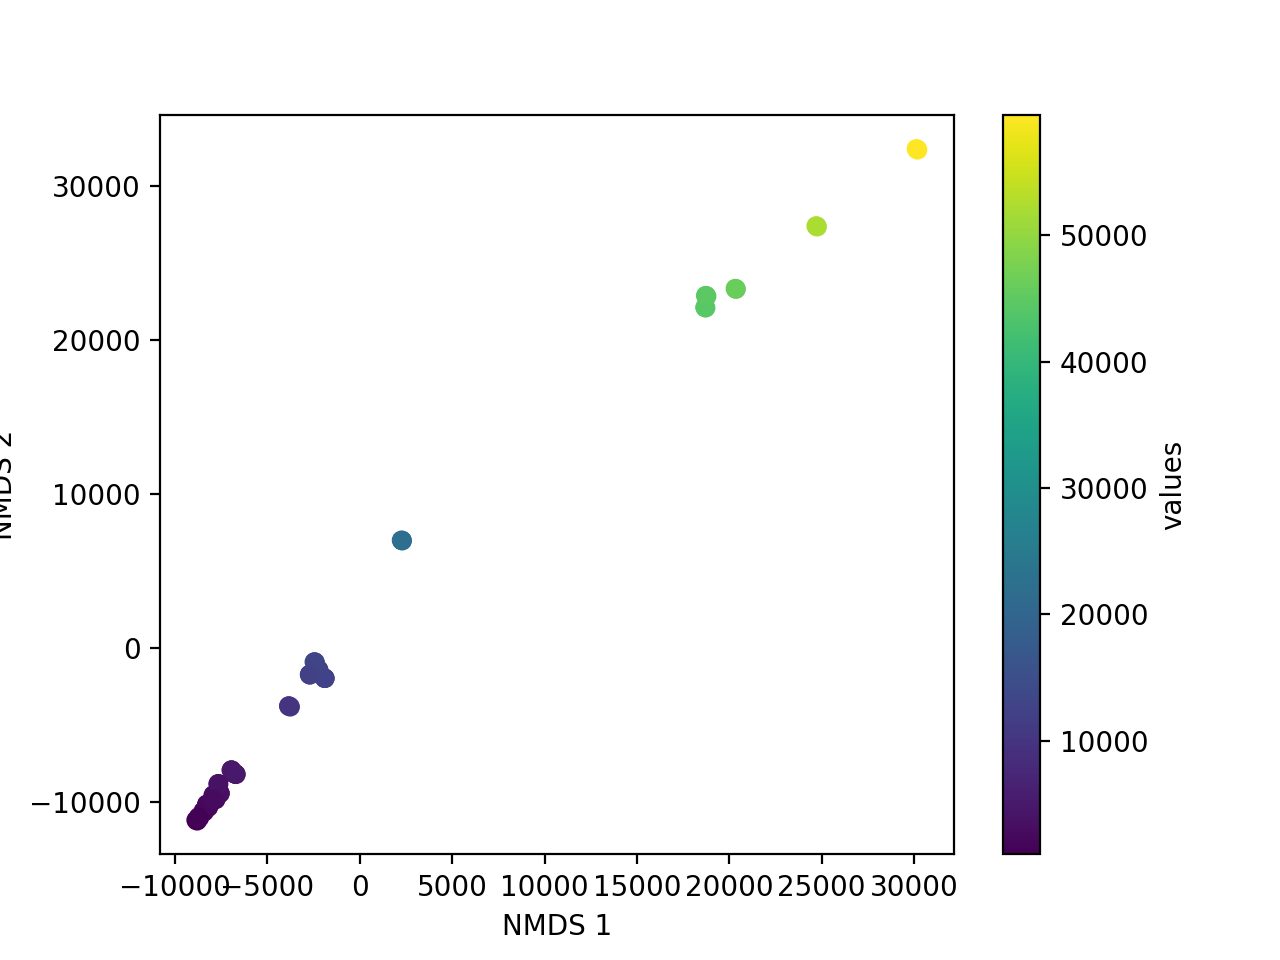

In [70]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(dist_df)
värv=suur_tabel.Ca_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [71]:
tulbad=['liigirikkus', 'pH', 'invadeeritus', 'lat', 'lon', 'P_AL', 'K_AL', 'Ca_AL', 'Mg_AL',
       'N_Kjel', 'C_Tjur']

In [72]:
väiksem_asi=suur_tabel[tulbad]

In [73]:
v_dist = pairwise_distances(väiksem_asi.values)

# Convert the distances matrix to a DataFrame for better visualization
v_dist_df = pd.DataFrame(v_dist, index=väiksem_asi.index, columns=väiksem_asi.index)
v_dist_df

,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
INV-1-R,0.000000,41512.350089,56823.267651,43512.577258,49464.300720,639.131250,2057.513556,10371.357093,10079.186045,7234.684051,...,291.056425,979.947252,9549.255888,1707.256173,563.429319,9845.518308,159.407835,1469.295085,42108.971742,19568.412771
INV-1-S,41512.350089,0.000000,15314.173421,2065.891119,8032.216568,42144.090031,39483.526031,31218.807537,31459.699652,34282.654938,...,41354.411215,40626.444586,32008.225336,43218.644950,42049.693964,31667.849582,41604.168963,42975.749957,758.600676,22401.522317
INV-10-R,56823.267651,15314.173421,0.000000,13314.422483,7431.846189,57454.543066,54792.009884,46515.547184,46764.186319,49592.442575,...,56665.150101,55934.907754,47310.789002,58529.518783,57360.723844,46979.152237,56914.952838,58287.155372,14735.672703,37601.796881
INV-10-S,43512.577258,2065.891119,13314.422483,0.000000,5983.715947,44143.505199,41479.675624,33201.564465,33450.507637,36280.669554,...,43354.320793,42622.085032,33996.635134,45218.722514,44050.177866,33668.816972,43604.274292,44976.588513,1701.069497,24322.973345
INV-11-R,49464.300720,8032.216568,7431.846189,5983.715947,0.000000,50094.540867,47427.725039,39137.570420,39394.608227,42231.045898,...,49305.918250,48568.348264,39937.425190,51170.126332,50002.333676,39622.638707,49556.215174,50928.409477,7533.683105,30182.214470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,9845.518308,31667.849582,46979.152237,33668.816972,39622.638707,10477.529181,7821.906852,1183.675873,659.787563,2620.761066,...,9688.384123,8964.063507,844.631441,11551.615055,10383.206415,0.000000,9937.811733,11308.259479,32266.153899,9955.338047
TRANS-8-R,159.407835,41604.168963,56914.952838,43604.274292,49556.215174,546.062685,2146.516887,10460.417864,10170.621864,7326.299326,...,285.245605,1069.402908,9639.393766,1616.385987,450.225810,9937.811733,0.000000,1379.622291,42200.442716,19660.427655
TRANS-8-S,1469.295085,42975.749957,58287.155372,44976.588513,50928.409477,849.408581,3516.405126,11832.566144,11543.309294,8697.543708,...,1632.837181,2392.302181,11010.432908,268.501734,935.455989,11308.259479,1379.622291,0.000000,43572.050744,21020.283262
TRANS-9-R,42108.971742,758.600676,14735.672703,1701.069497,7533.683105,42740.985000,40083.334684,31829.275459,32065.238181,34882.660956,...,41951.024692,41227.647156,32615.950854,43815.068317,42645.715786,32266.153899,42200.442716,43572.050744,0.000000,23055.813047


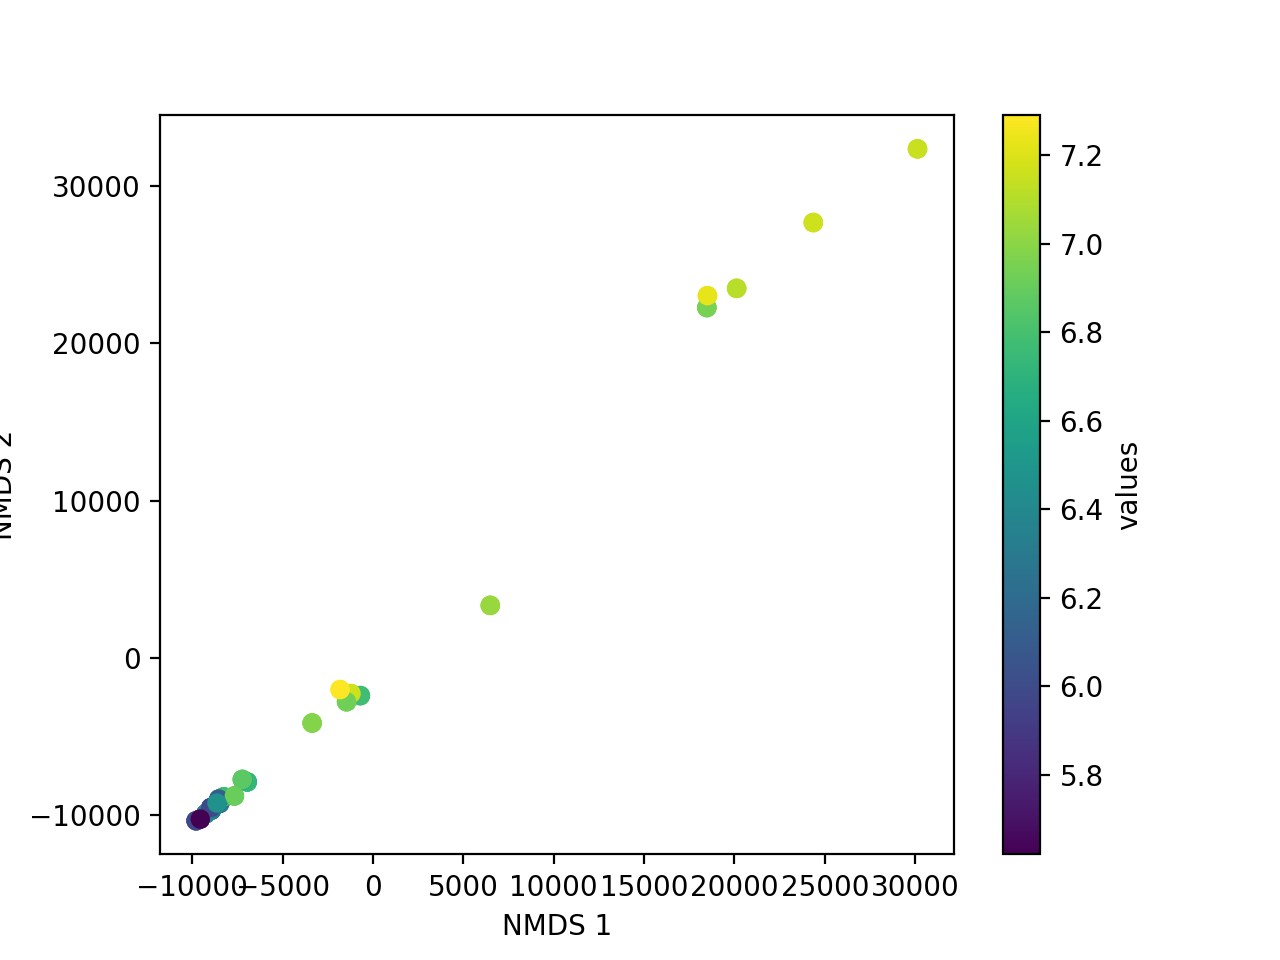

In [74]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.pH.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [75]:
tulbad

['liigirikkus',
 'pH',
 'invadeeritus',
 'lat',
 'lon',
 'P_AL',
 'K_AL',
 'Ca_AL',
 'Mg_AL',
 'N_Kjel',
 'C_Tjur']

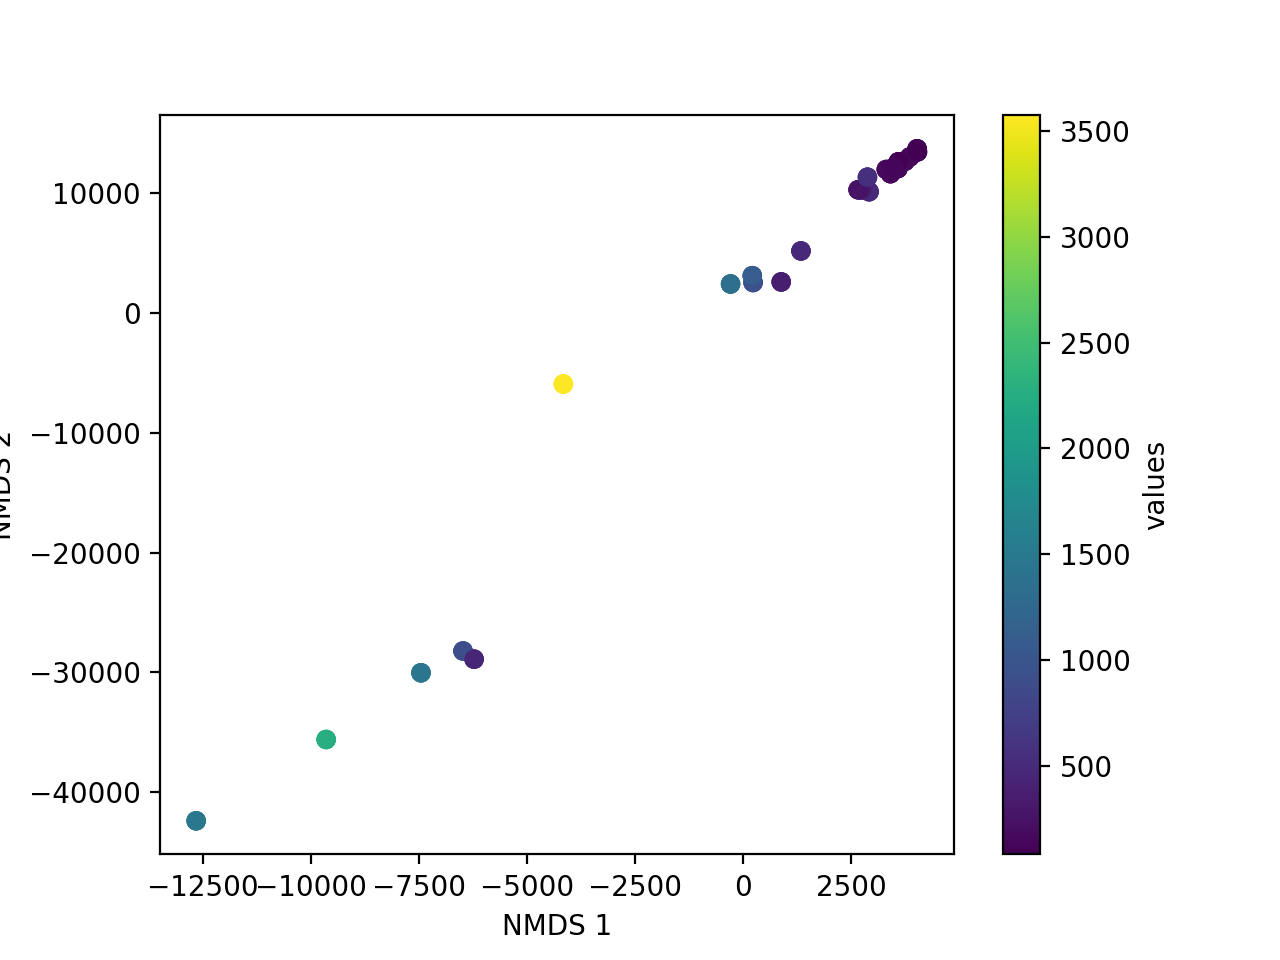

In [76]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.Mg_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

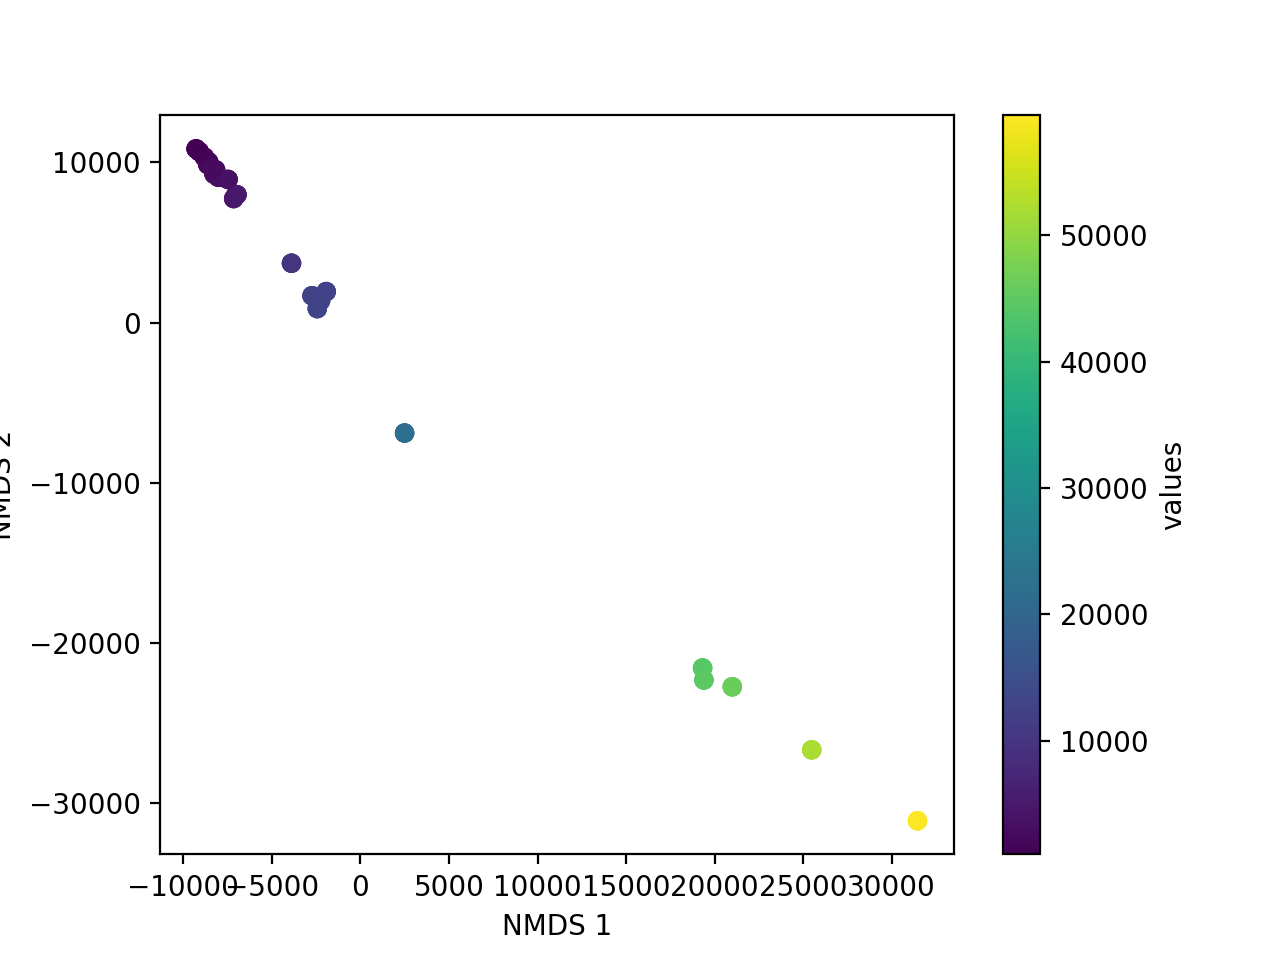

In [77]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.Ca_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

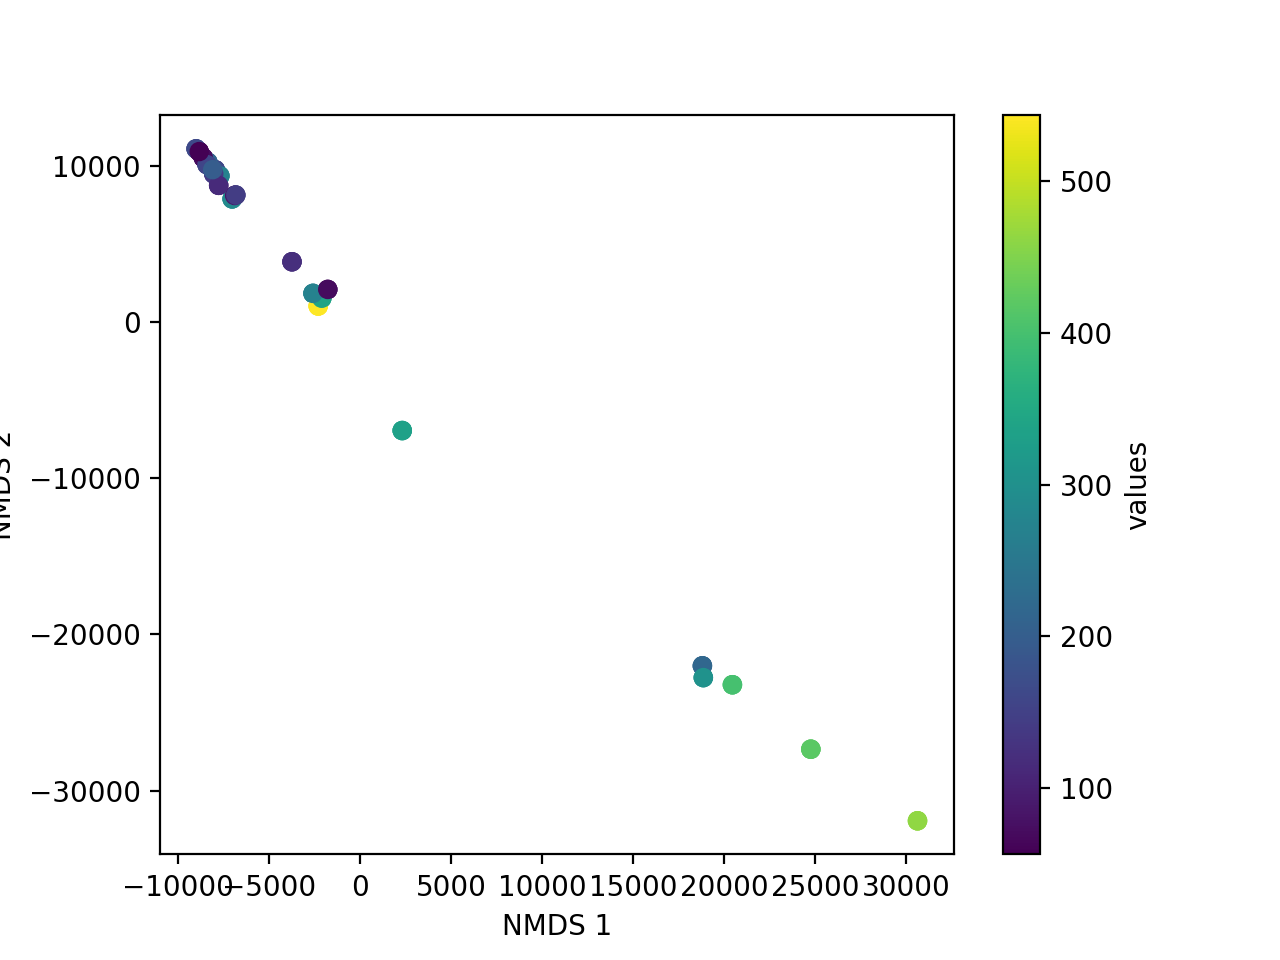

In [78]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed',normalized_stress='auto')
emb = mds.fit_transform(v_dist_df)
värv=väiksem_asi.K_AL.values

plt.scatter(emb[:, 0], emb[:, 1],c=värv, cmap='viridis')
plt.xlabel('NMDS 1')
plt.ylabel('NMDS 2')
plt.colorbar(label='values')
plt.show()

In [79]:
inv=väiksem_asi[väiksem_asi.invadeeritus==1]
trans=väiksem_asi[väiksem_asi.invadeeritus==2]
nat=väiksem_asi[väiksem_asi.invadeeritus==3]
nat

,liigirikkus,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur
NAT-1-R,13,6.30,3.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905
NAT-1-S,22,6.95,3.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513
NAT-10-R,10,7.15,3.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892
NAT-10-S,17,7.11,3.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866
NAT-11-R,8,7.16,3.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100
NAT-11-S,16,6.26,3.0,58.060173,22.207555,70.301578,211.503895,2080.287597,176.1,0.295578,3.528445
NAT-12-R,5,6.72,3.0,58.259621,22.512139,89.335456,286.908078,4736.967768,478.0,0.461000,5.220597
NAT-13-R,12,6.78,3.0,58.415867,22.546793,237.736710,543.463381,13004.791239,1341.5,0.677279,12.165738
NAT-2-R,19,7.16,3.0,58.393507,26.710398,88.095238,340.873016,12758.730159,935.6,0.306250,3.442916
NAT-2-S,16,6.98,3.0,58.395700,26.737531,110.955897,122.131311,9938.136101,491.4,0.277187,3.061475


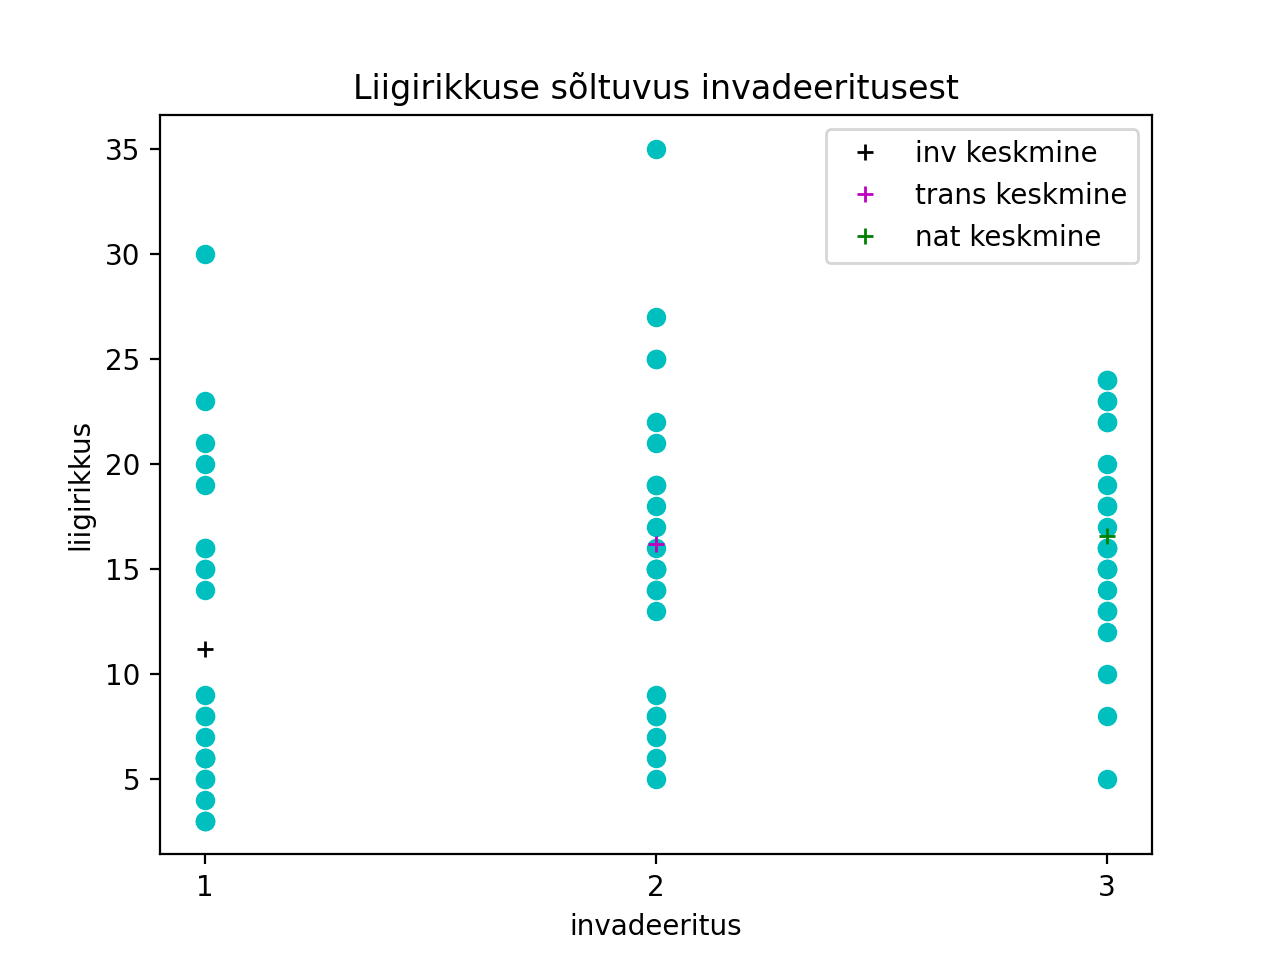

In [80]:
plt.plot( väiksem_asi.invadeeritus, väiksem_asi.liigirikkus,'co')
plt.plot(1,inv.liigirikkus.mean(),'k+',label='inv keskmine')
plt.plot(2,trans.liigirikkus.mean(),'m+',label='trans keskmine')
plt.plot(3,nat.liigirikkus.mean(),'g+',label='nat keskmine')
plt.title('Liigirikkuse sõltuvus invadeeritusest')
plt.ylabel('liigirikkus')
plt.xlabel('invadeeritus')
plt.xticks( np.arange(1, 4, 1) )
plt.legend()
plt.show()

In [81]:
väiksem_asi.columns

Index(['liigirikkus', 'pH', 'invadeeritus', 'lat', 'lon', 'P_AL', 'K_AL',
       'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur'],
      dtype='object')

In [82]:
taimed

,Reynoutria_japonica,Solidago_canadensis,Aegopodium_podagraria,Ranunculus_auricomus,Alopecurus_pratensis,Elymus_repens,Agrostis_capillaris,Festuca_rubra,Cirsium_arvensis,Taraxacum_officinale,...,Plantago_lanceolata,Daucus_carota,Achillea_millefolia,Allium_scorodoprasum,Veronica_teucrium,Agrimonia_eupatoria,Plantago_media,Sonchus_arvensis,Prunus_domestica,Salix_alba
sample,,,,,,,,,,,,,,,,,,,,,
INV-1-R,86.666667,0.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV-1-S,0.000000,0.000000,10.666667,0.000000,0.000000,0.166667,0.000000,16.666667,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV-10-R,71.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV-10-S,0.000000,87.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
INV-11-R,91.666667,0.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,0.000000,25.000000,0.000000,0.000000,0.000000,4.333333,2.333333,5.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TRANS-8-R,25.000000,0.000000,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
TRANS-8-S,0.000000,30.000000,30.000000,1.666667,0.333333,1.666667,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [83]:
suur_tabel[['invadeeritus','lat','lon']]
tulbad

['liigirikkus',
 'pH',
 'invadeeritus',
 'lat',
 'lon',
 'P_AL',
 'K_AL',
 'Ca_AL',
 'Mg_AL',
 'N_Kjel',
 'C_Tjur']

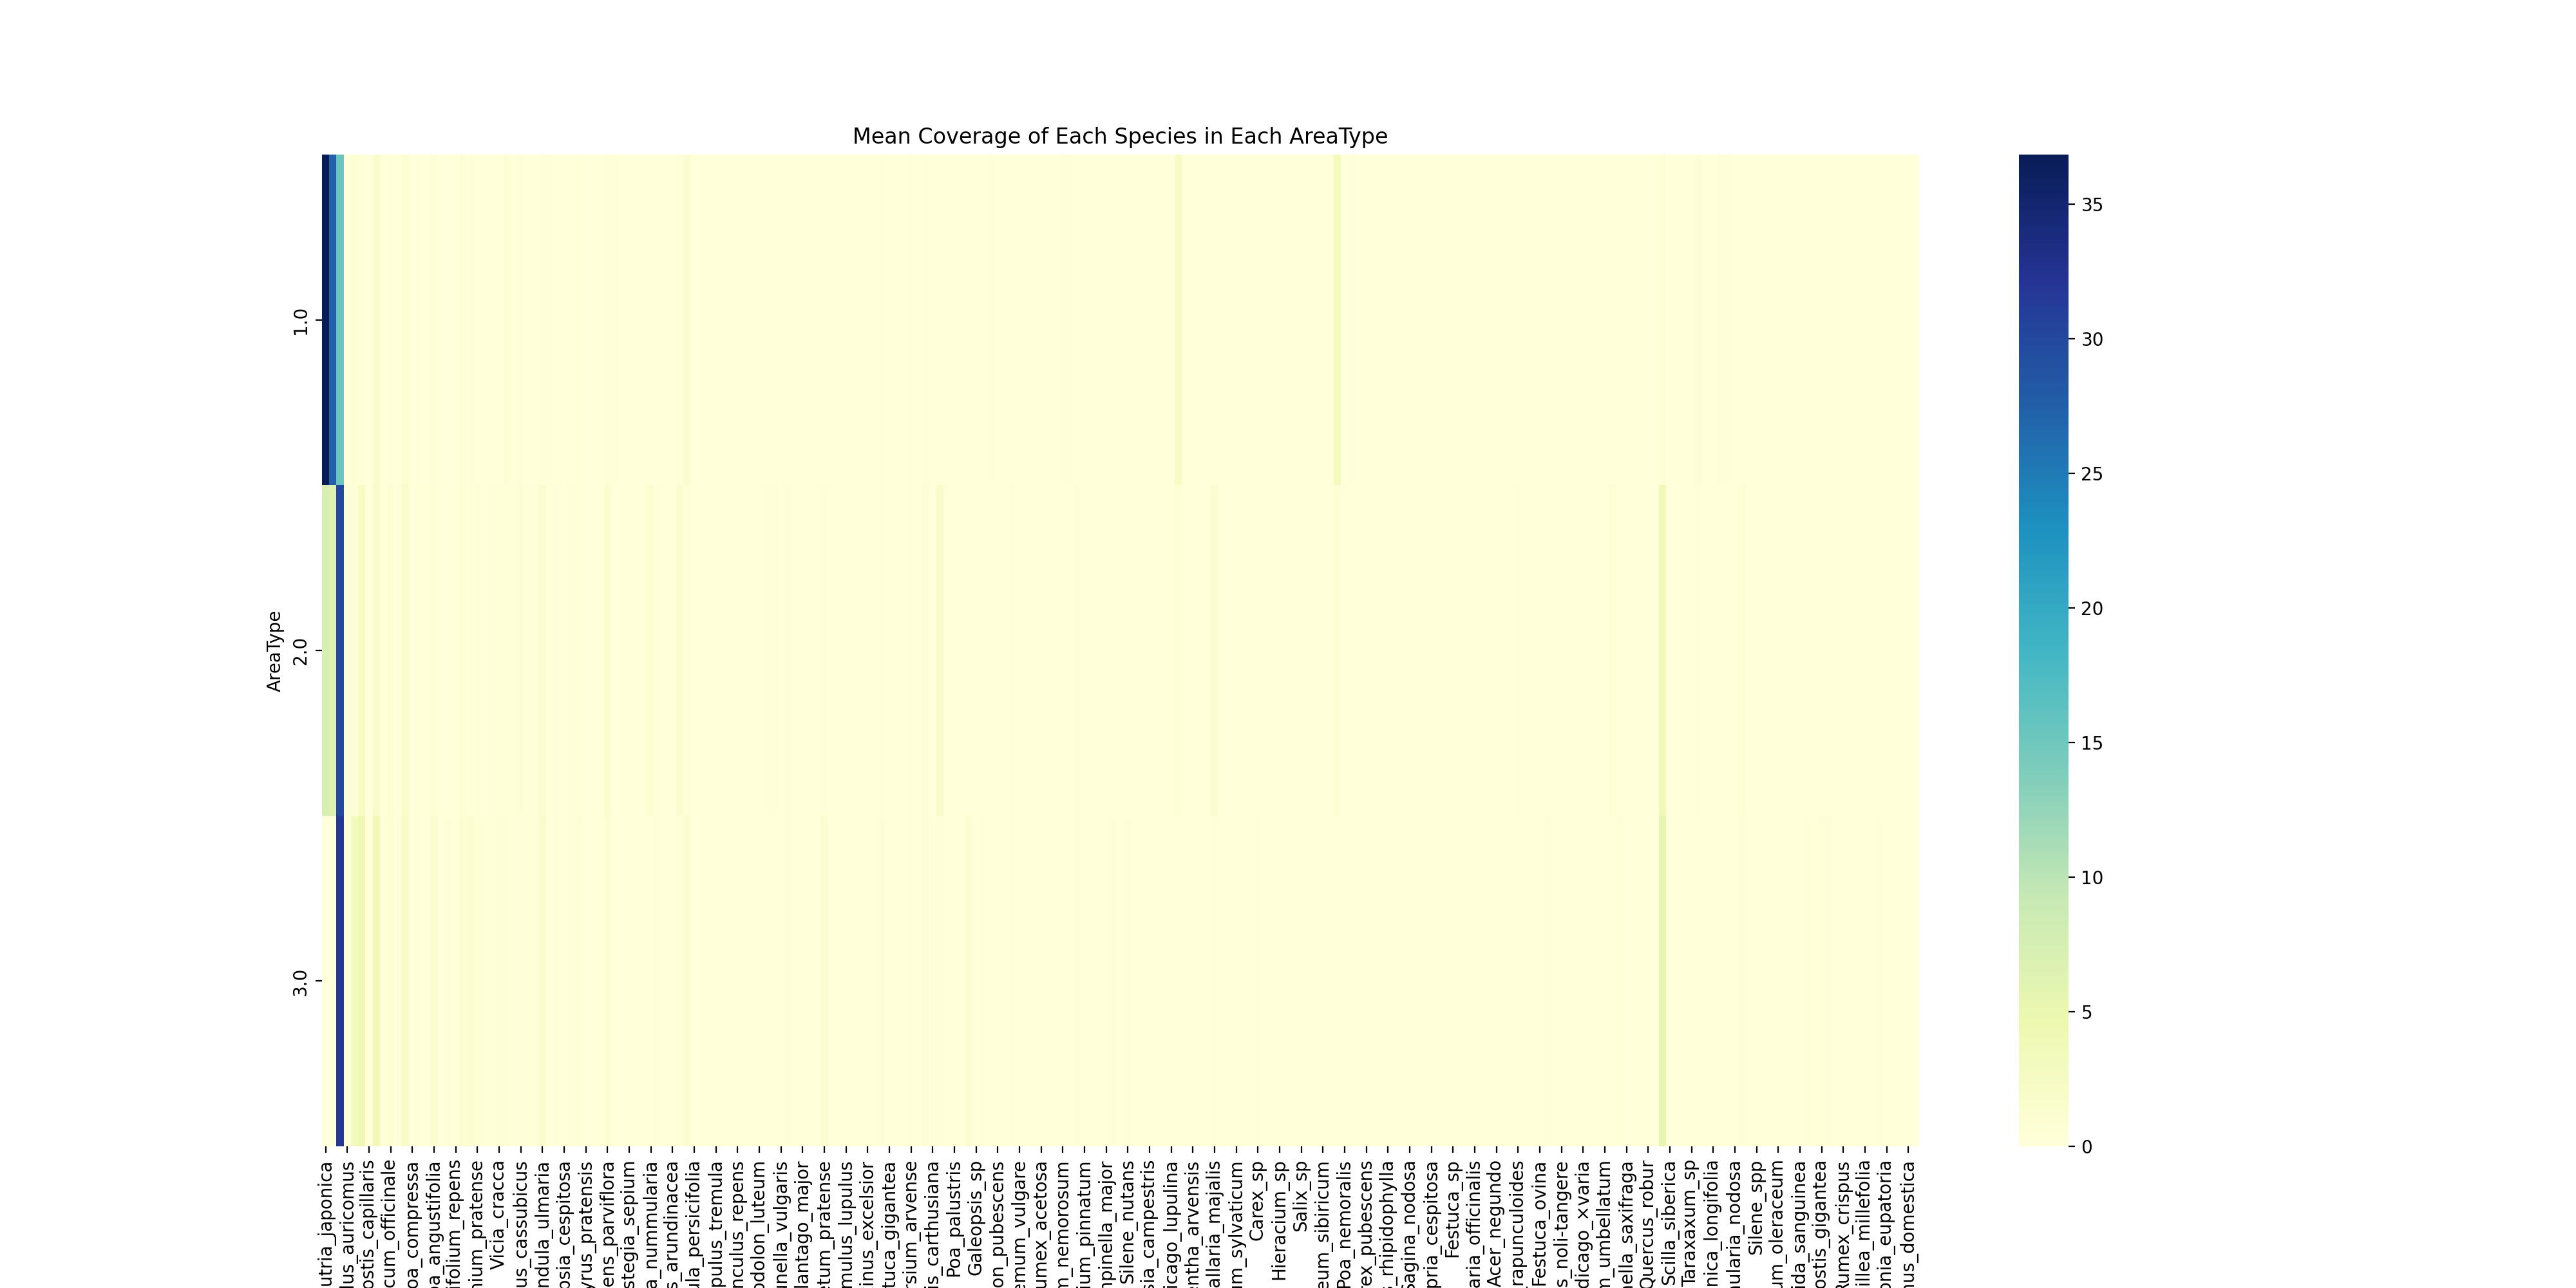

In [84]:
species_cols = [col for col in suur_tabel.columns if col not in ['liigirikkus',
 'pH',
 'invadeeritus',
 'lat',
 'lon',
 'P_AL',
 'K_AL',
 'Ca_AL',
 'Mg_AL',
 'N_Kjel',
 'C_Tjur']]

mean_coverage_by_area = suur_tabel.groupby('invadeeritus')[species_cols].mean()

# Plot the mean coverage for each species in each AreaType
plt.figure(figsize=(20, 10))
sns.heatmap(mean_coverage_by_area, cmap='YlGnBu')
plt.title('Mean Coverage of Each Species in Each AreaType')
plt.ylabel('AreaType')
plt.xlabel('Species')
plt.show()

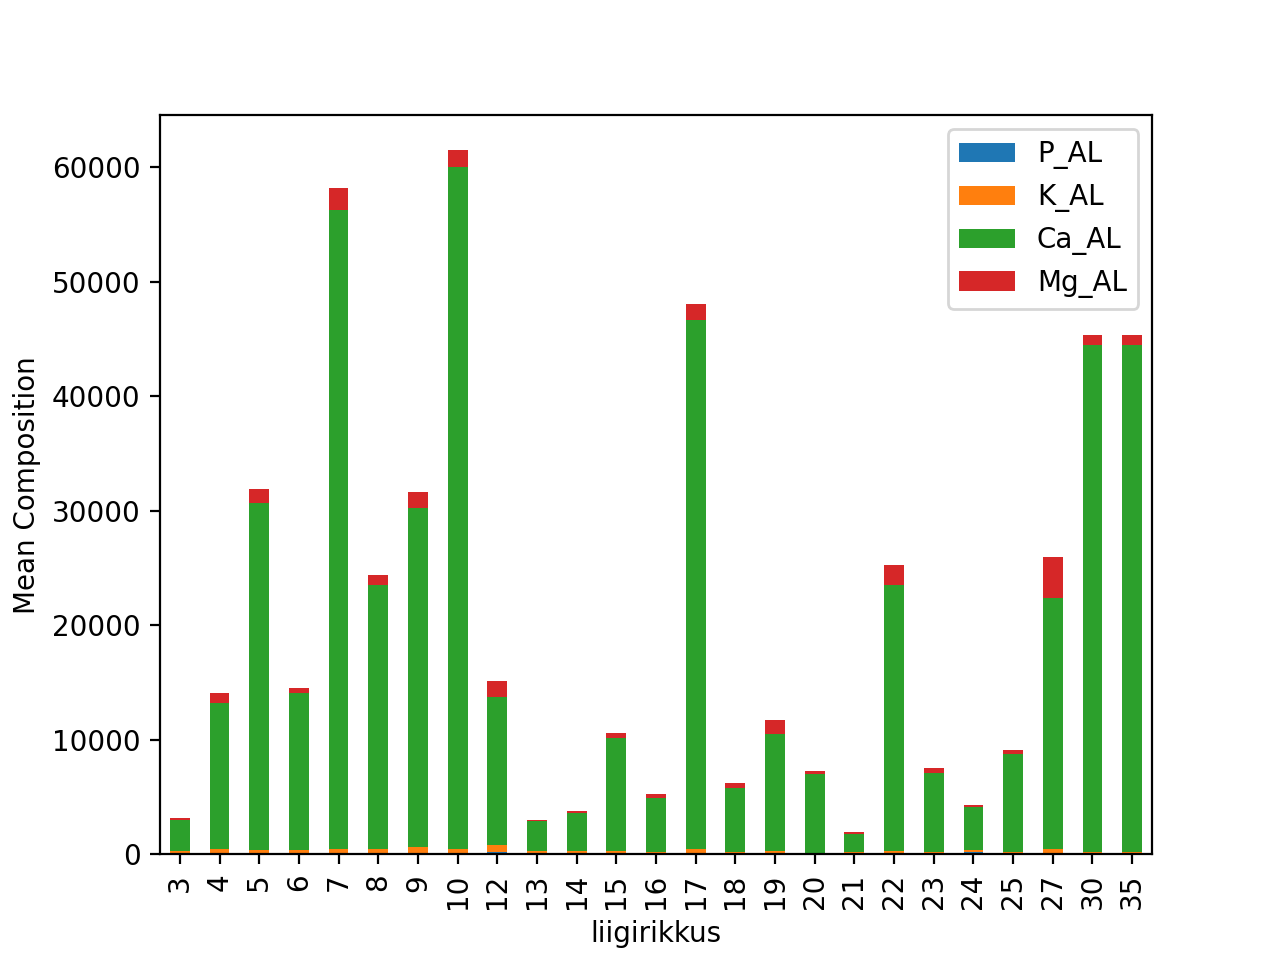

In [85]:
#soil_cols = ['P_AL', 'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur']
soil_cols = ['P_AL', 'K_AL', 'Ca_AL', 'Mg_AL']

# Calculate the mean of each soil composition element in each AreaType
mean_soil_by_area = väiksem_asi.groupby('liigirikkus')[soil_cols].mean()

# Plot the mean for each soil composition element in each AreaType
mean_soil_by_area.plot(kind='bar', stacked=True)
plt.ylabel('Mean Composition')
plt.xlabel('liigirikkus')
plt.show()

In [86]:
m = folium.Map(location=[58.5953, 25.0136], zoom_start=7)  # coordinates for Estonia

# Add a marker for each location
for idx, row in väiksem_asi.iterrows():
    # The color of the marker is determined by species richness
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=plt.cm.viridis(row['liigirikkus'] / väiksem_asi['liigirikkus'].max()),
        fill=True,
    ).add_to(m)

# Display the map
m

In [87]:
väiksem_asi.loc[:, 'invasiivsete_katvus'] = invasiivsete_katvus.values
väiksem_asi.loc[:, 'tavaliste_katvus'] = tavaliste_katvus.values
väiksem_asi.loc[:, 'kogu_katvus'] = kogu_katvus.values

C:\Users\reeli\AppData\Local\Temp\ipykernel_33956\3678203540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\reeli\AppData\Local\Temp\ipykernel_33956\3678203540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\reeli\AppData\Local\Temp\ipykernel_33956\3678203540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

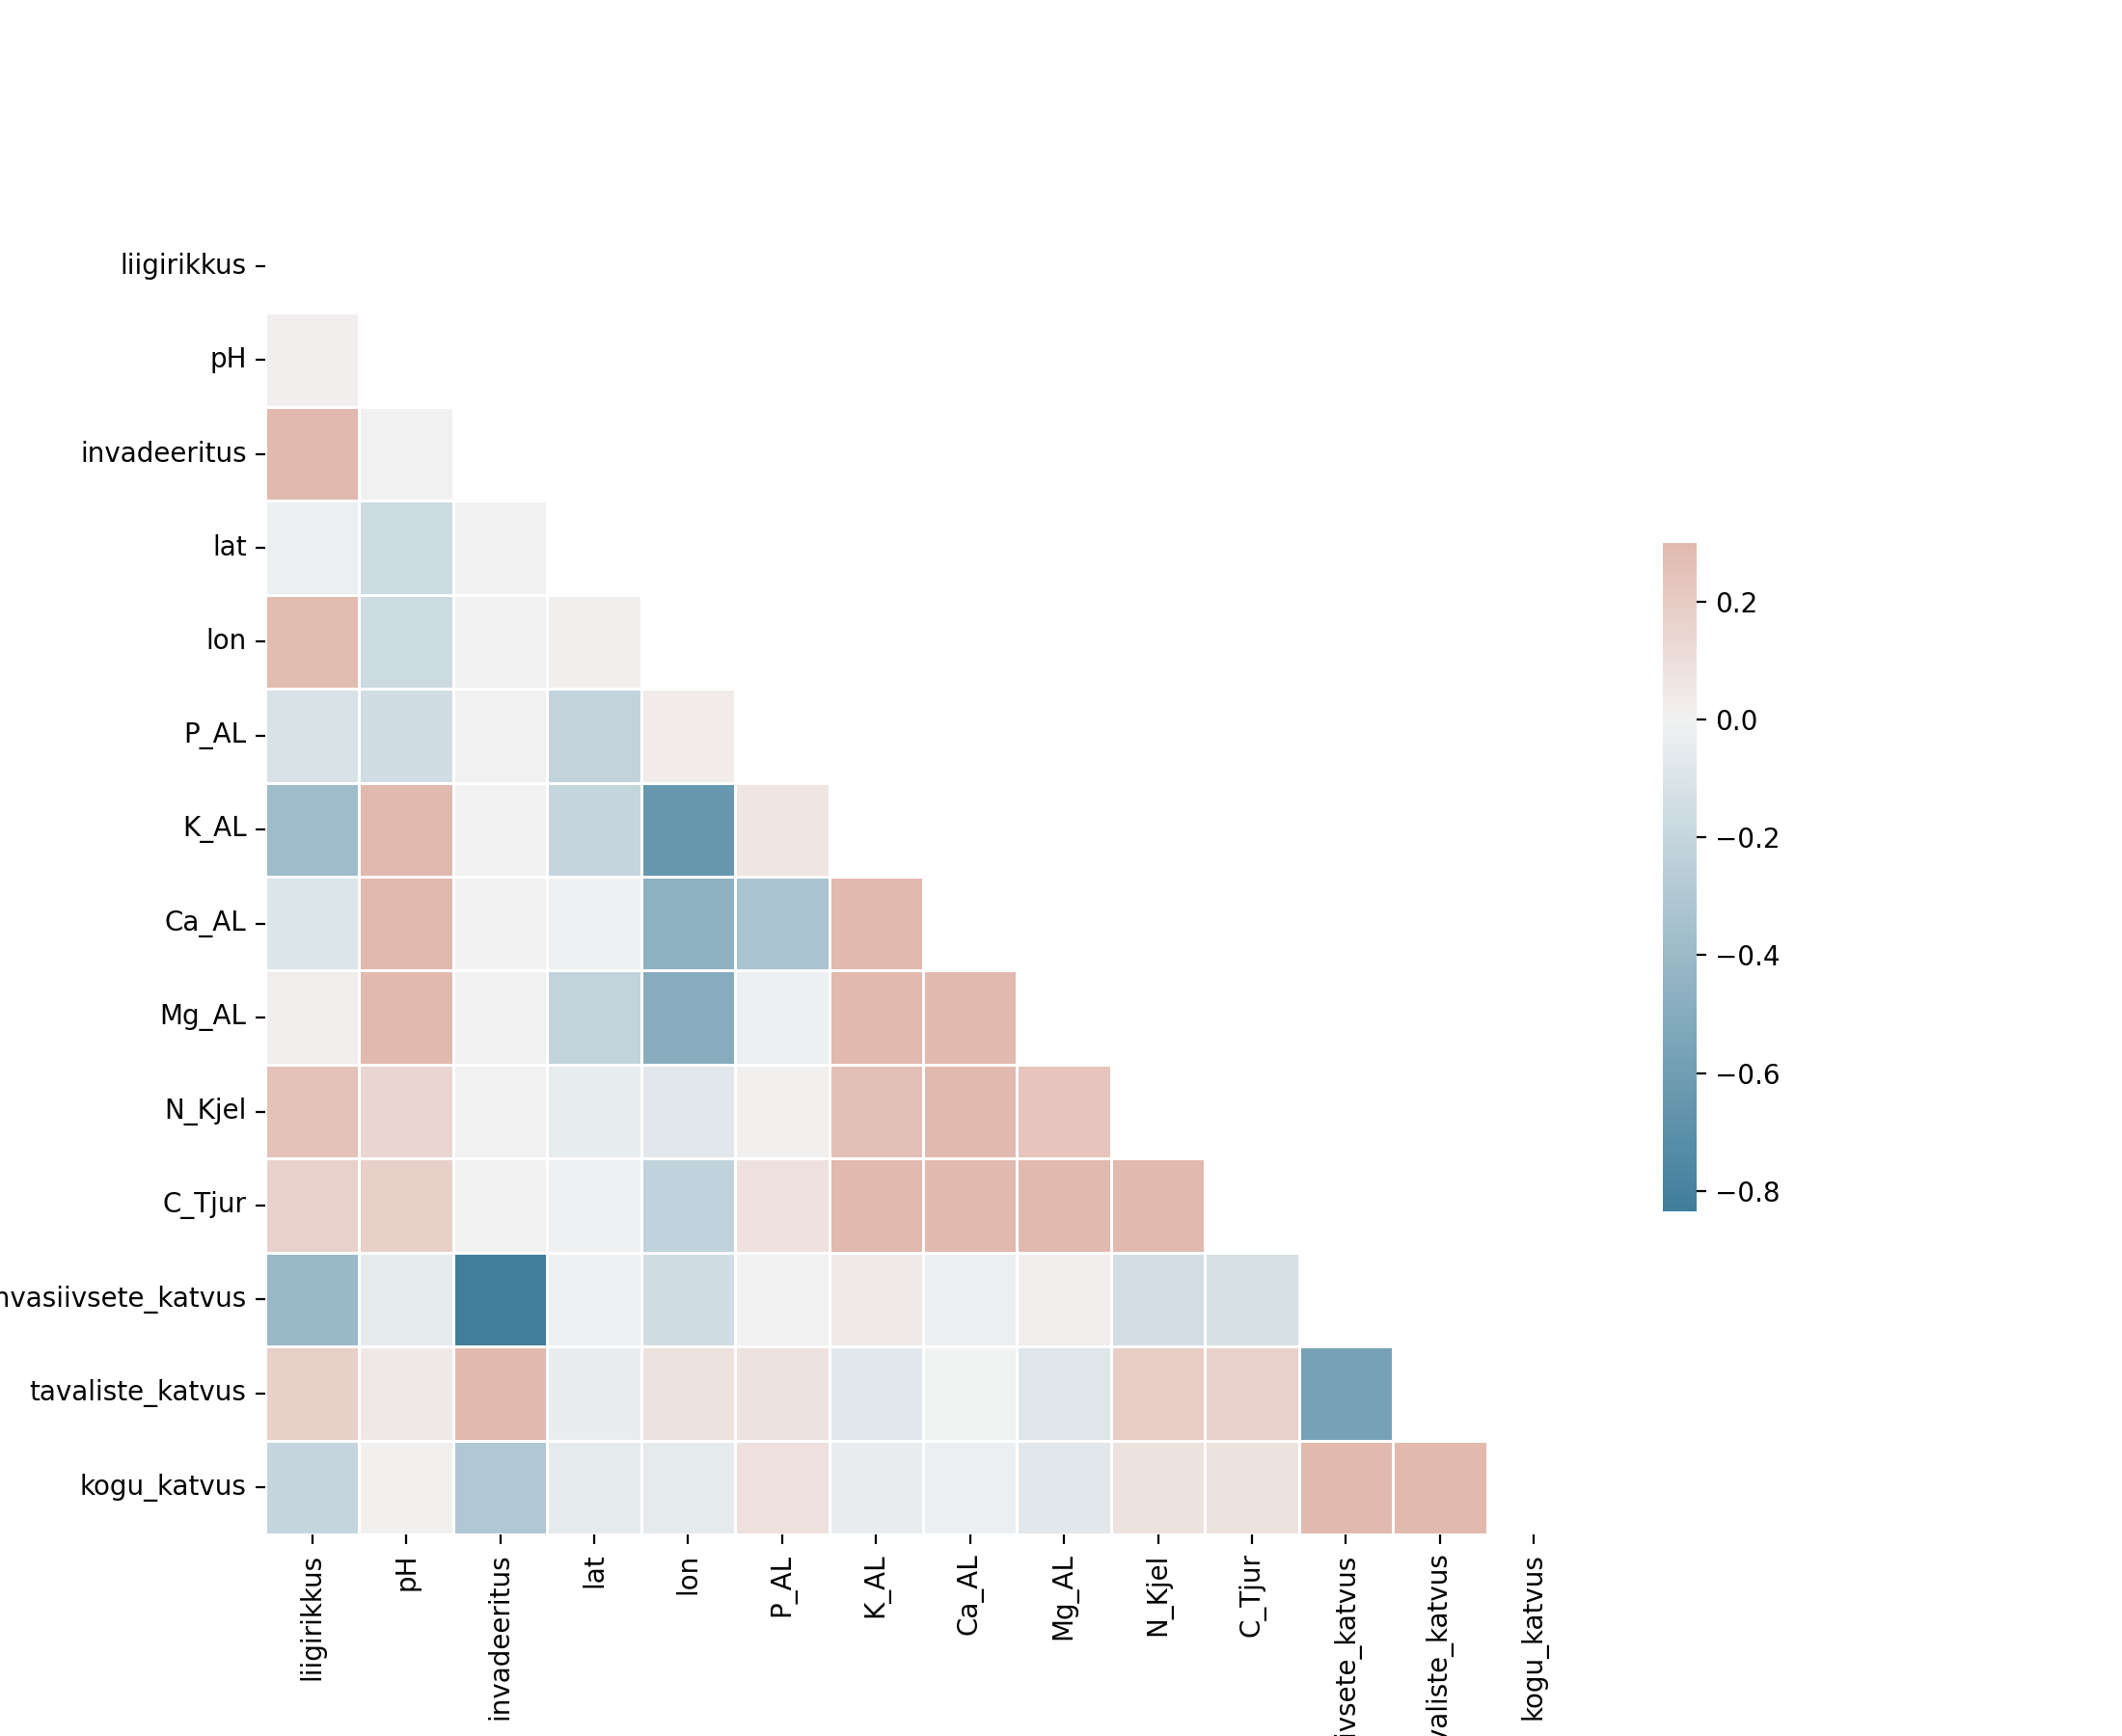

In [88]:
# Compute the correlation matrix
corr = väiksem_asi.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [89]:
väiksem_asi

,liigirikkus,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur,invasiivsete_katvus,tavaliste_katvus,kogu_katvus
INV-1-R,3,6.30,1.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905,86.666667,18.500000,105.166667
INV-1-S,30,6.95,1.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513,0.000000,91.666667,91.666667
INV-10-R,5,7.15,1.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892,71.666667,5.333333,77.000000
INV-10-S,9,7.11,1.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866,87.333333,9.000000,96.333333
INV-11-R,7,7.16,1.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100,91.666667,7.666667,99.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,25,7.29,2.0,59.385577,24.728316,59.810501,71.259376,12555.073036,370.0,0.100972,2.205332,25.000000,62.000000,87.000000
TRANS-8-R,14,6.46,2.0,59.434088,24.685018,126.319984,198.844391,2621.239291,128.7,0.192702,2.779692,25.000000,48.333333,73.333333
TRANS-8-S,19,5.62,2.0,59.434088,24.685018,81.850534,56.346382,1250.494267,82.8,0.188233,2.898748,30.000000,58.000000,88.000000
TRANS-9-R,8,7.23,2.0,59.405796,24.640119,74.281150,302.515974,44820.287540,451.5,0.220167,2.613467,25.000000,94.333333,119.333333


In [90]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# df = pd.read_csv('your_file.csv')

# Select the columns to use for clustering
# In this case, let's use soil composition and species richness
selected_columns = ['P_AL', 'K_AL', 'Ca_AL', 'Mg_AL', 'N_Kjel', 'C_Tjur', 'liigirikkus']
data_for_clustering = väiksem_asi[selected_columns]

# Create a KMeans object
kmeans = KMeans(n_clusters=3)  # choose the number of clusters

# Fit the KMeans object to the data
kmeans.fit(data_for_clustering)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add the cluster assignments to the original DataFrame
väiksem_asi['cluster'] = clusters

C:\Anaconda\envs\IDS\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Anaconda\envs\IDS\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
C:\Users\reeli\AppData\Local\Temp\ipykernel_33956\2854741887.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [91]:
väiksem_asi

,liigirikkus,pH,invadeeritus,lat,lon,P_AL,K_AL,Ca_AL,Mg_AL,N_Kjel,C_Tjur,invasiivsete_katvus,tavaliste_katvus,kogu_katvus,cluster
INV-1-R,3,6.30,1.0,58.858114,26.931854,3.324208,159.170903,2712.749316,143.1,0.259012,3.017905,86.666667,18.500000,105.166667,2
INV-1-S,30,6.95,1.0,58.777722,26.309980,30.739205,216.882166,44218.101976,902.0,1.333638,15.982513,0.000000,91.666667,91.666667,1
INV-10-R,5,7.15,1.0,58.278045,22.500830,36.522430,463.477570,59519.650655,1472.0,0.227349,4.500892,71.666667,5.333333,77.000000,1
INV-10-S,9,7.11,1.0,58.255485,22.473204,64.330958,400.039588,46205.463183,1434.0,0.263493,3.926866,87.333333,9.000000,96.333333,1
INV-11-R,7,7.16,1.0,58.259786,22.512229,39.801980,418.613861,52130.693069,2268.0,0.289306,4.733100,91.666667,7.666667,99.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRANS-7-S,25,7.29,2.0,59.385577,24.728316,59.810501,71.259376,12555.073036,370.0,0.100972,2.205332,25.000000,62.000000,87.000000,0
TRANS-8-R,14,6.46,2.0,59.434088,24.685018,126.319984,198.844391,2621.239291,128.7,0.192702,2.779692,25.000000,48.333333,73.333333,2
TRANS-8-S,19,5.62,2.0,59.434088,24.685018,81.850534,56.346382,1250.494267,82.8,0.188233,2.898748,30.000000,58.000000,88.000000,2
TRANS-9-R,8,7.23,2.0,59.405796,24.640119,74.281150,302.515974,44820.287540,451.5,0.220167,2.613467,25.000000,94.333333,119.333333,1


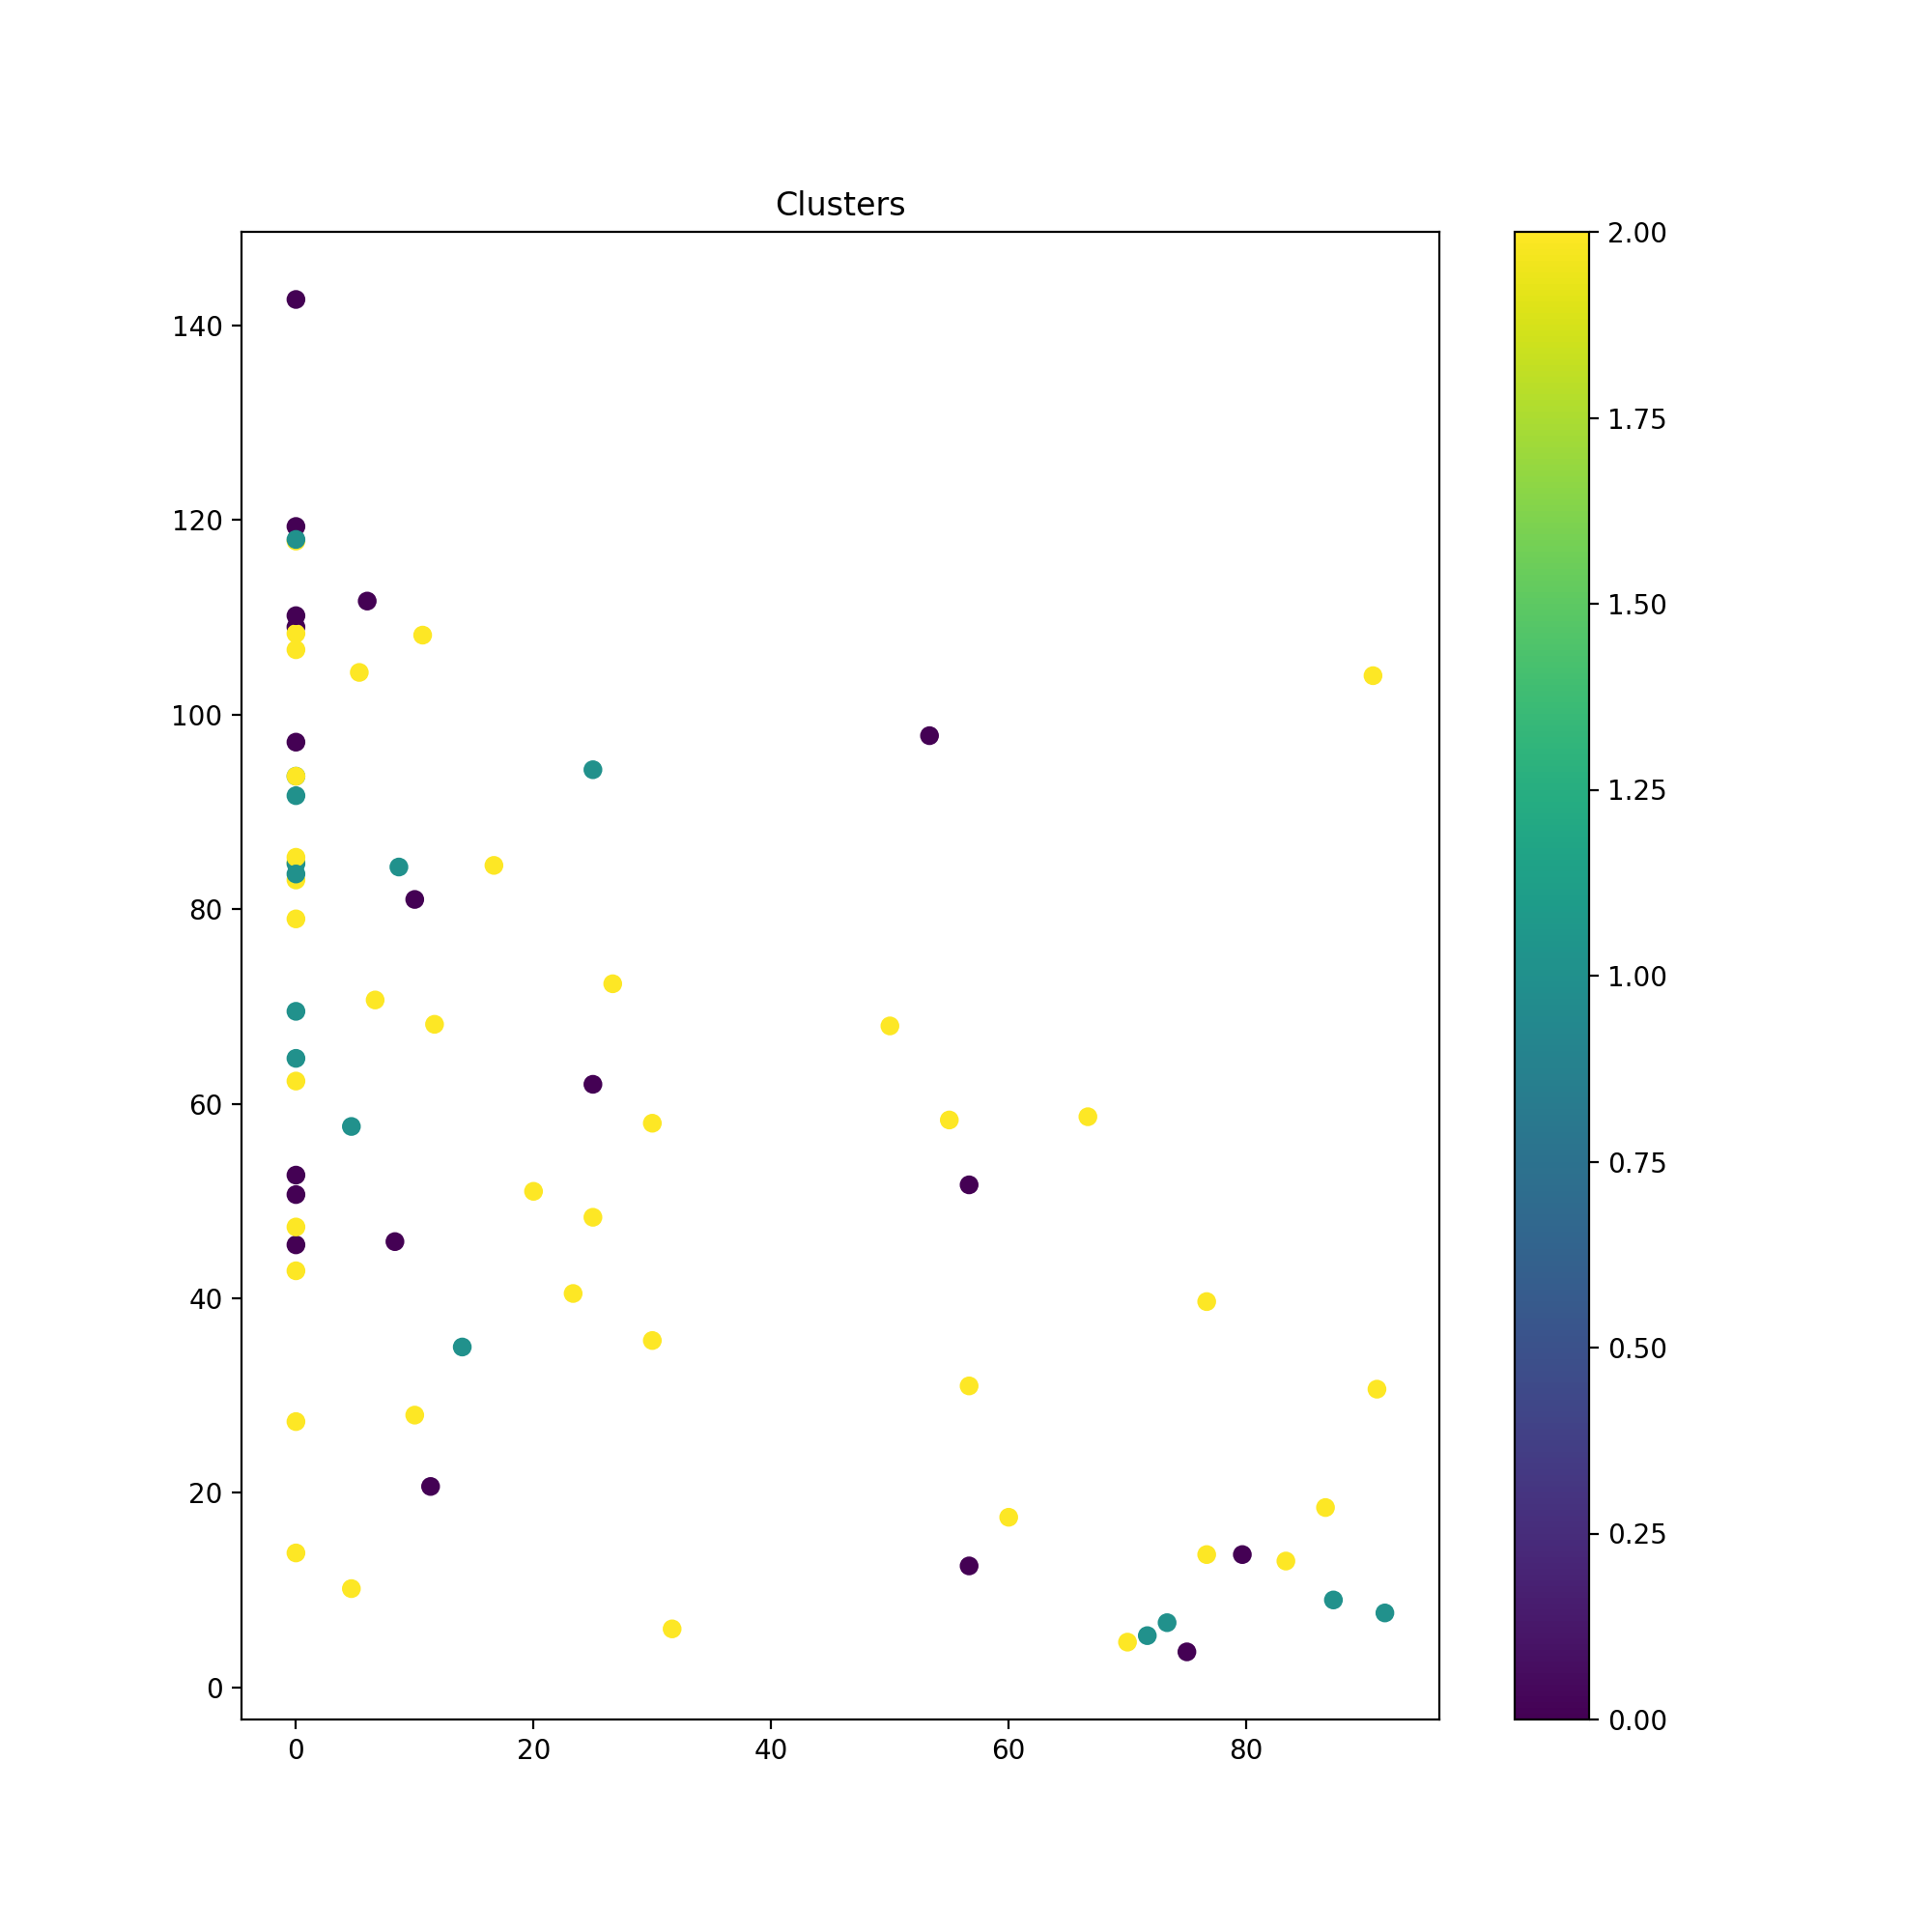

In [92]:
plt.figure(figsize=(10, 10))
plt.scatter(väiksem_asi['invasiivsete_katvus'], väiksem_asi['tavaliste_katvus'], c=väiksem_asi['cluster'])
plt.title('Clusters')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.show()

C:\Anaconda\envs\IDS\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


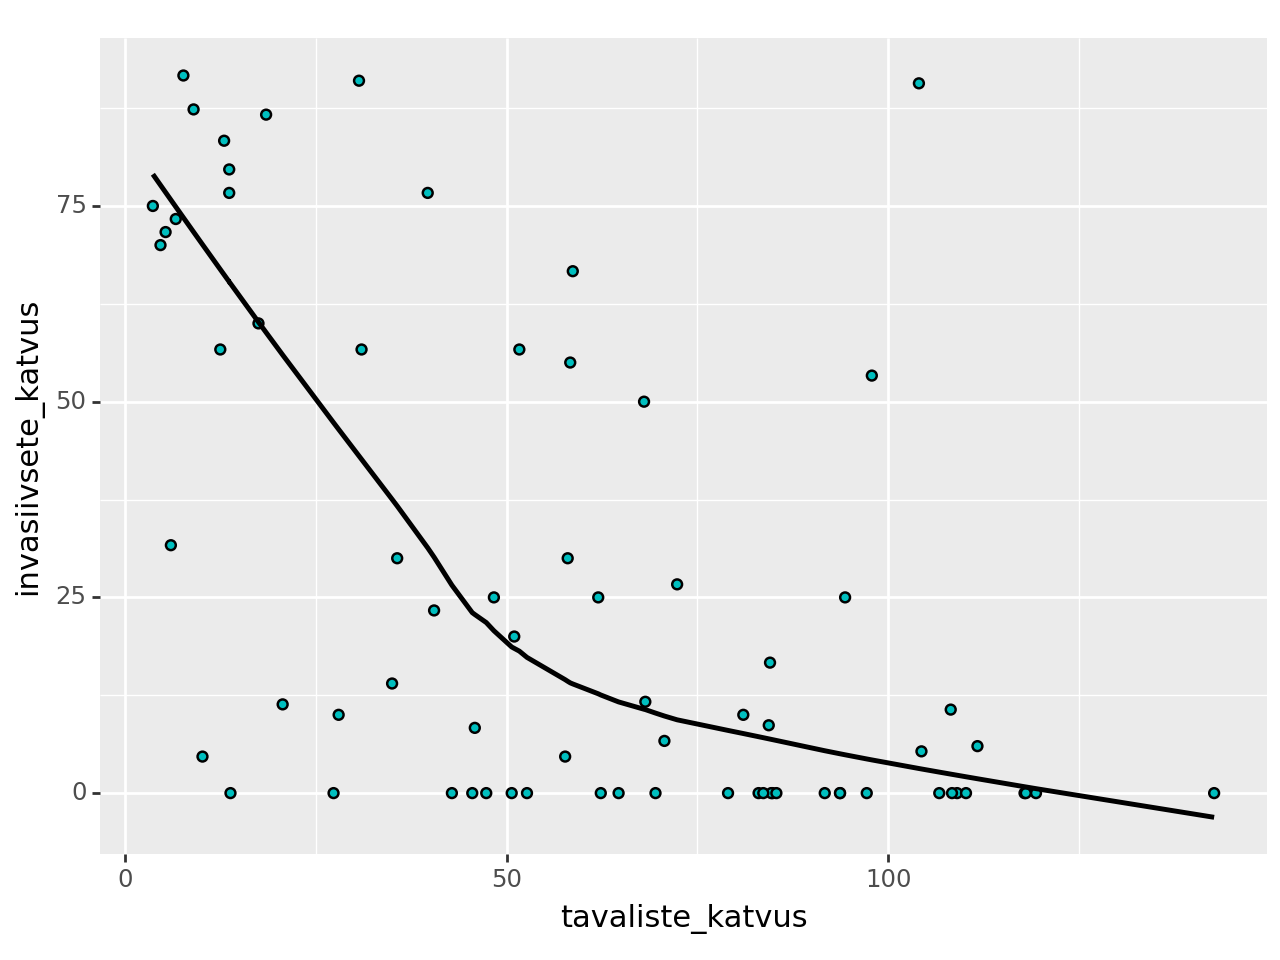

<Figure Size: (640 x 480)>

In [93]:
(
p9.ggplot(
    data = väiksem_asi, 
    mapping = p9.aes(y = 'invasiivsete_katvus', x = 'tavaliste_katvus')
) + 
    p9.geom_point(fill='c')
    +p9.geom_smooth(fill='m')
)

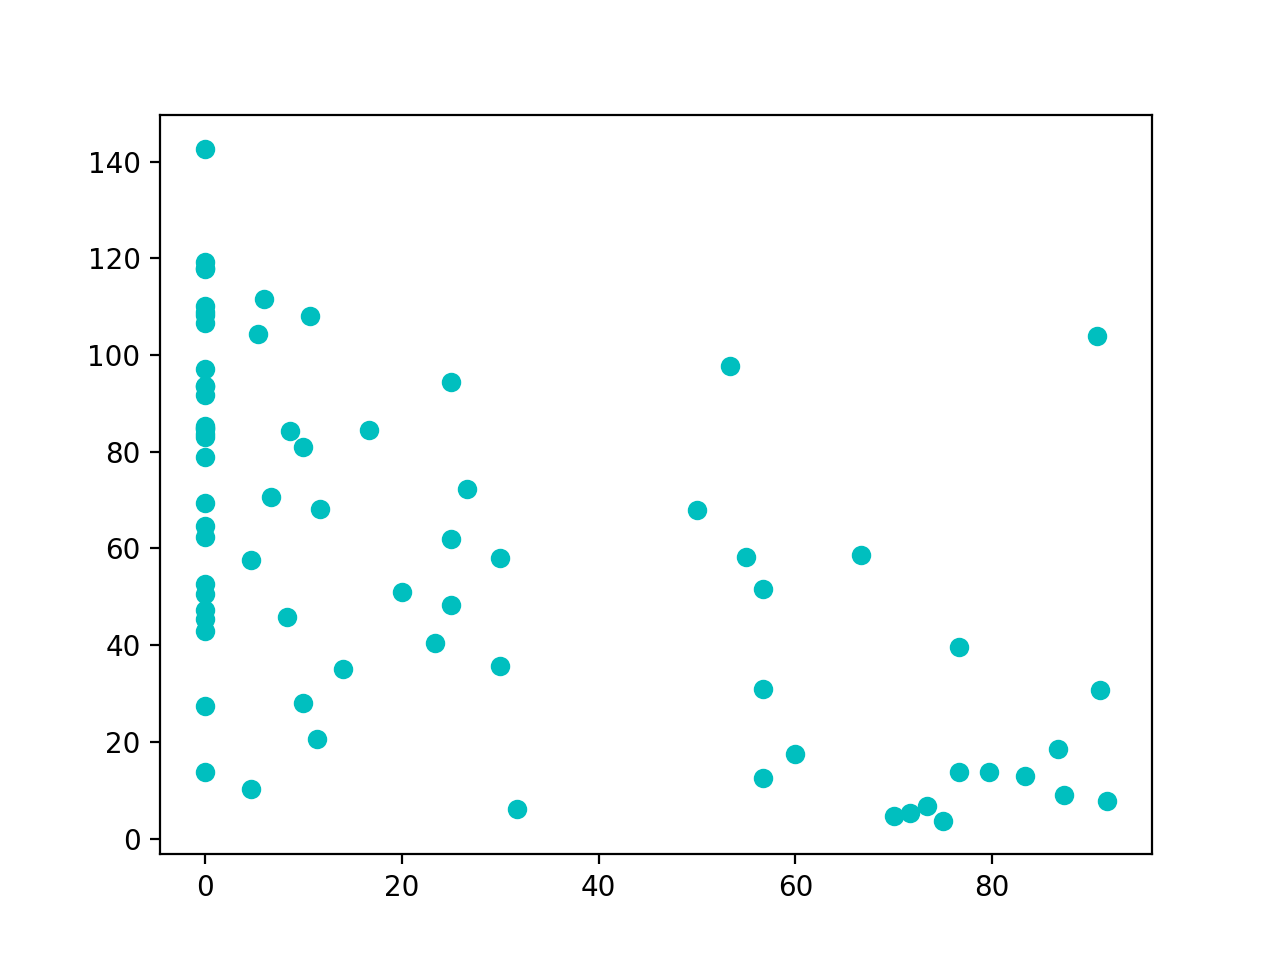

In [99]:
plt.plot(väiksem_asi.invasiivsete_katvus,väiksem_asi.tavaliste_katvus,'co')
plt.show()

a = -0.66 ± 0.11
b = 77.39 ± 4.58
s = 29.93


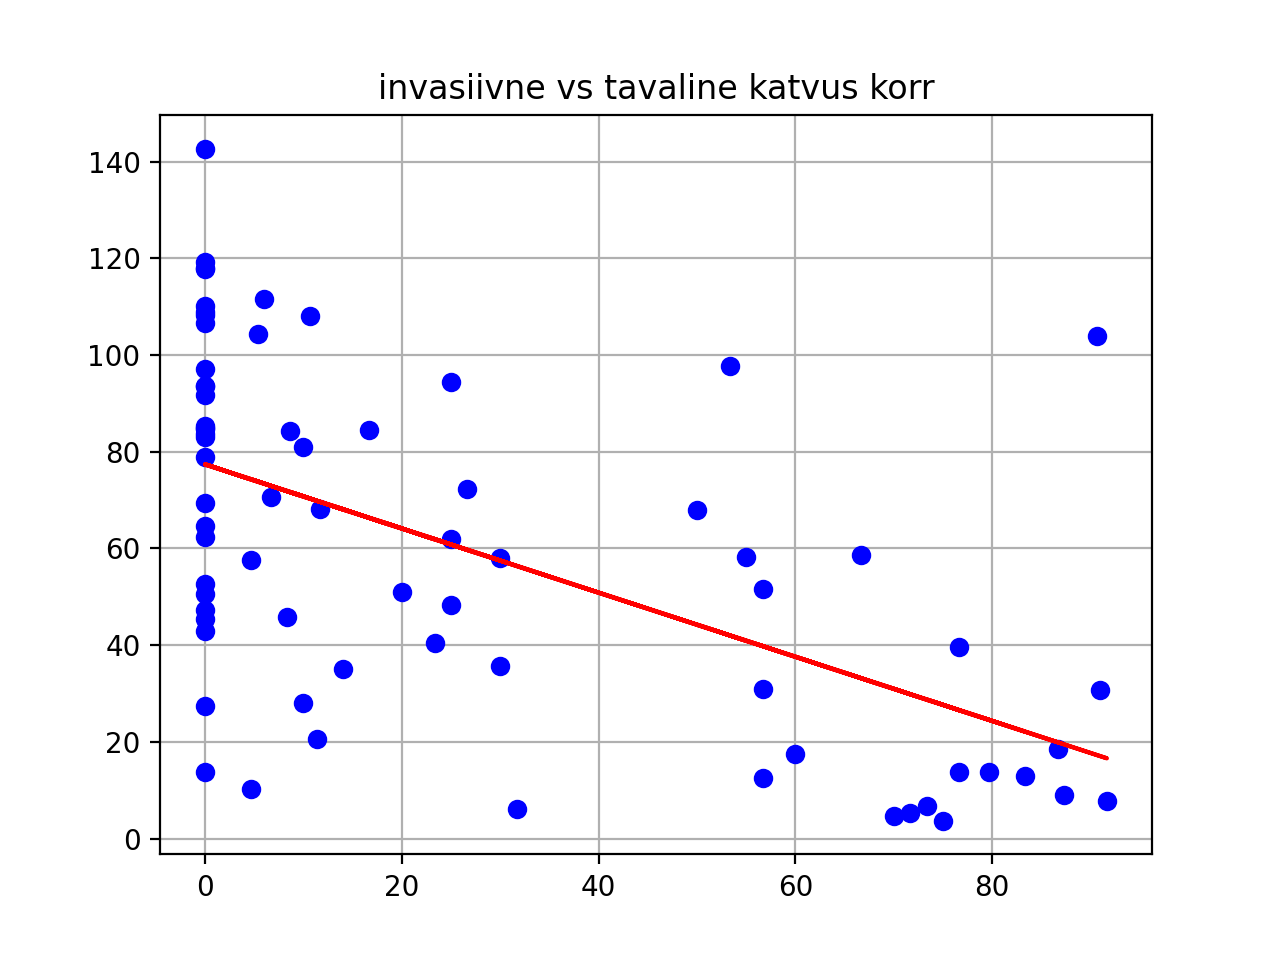

In [95]:
from scipy.stats import linregress

X=väiksem_asi.invasiivsete_katvus
Y=väiksem_asi.tavaliste_katvus

# sobitame sirge
a, b, _, _, ua = linregress(X, Y)
Y1 = a * X + b
s = np.sqrt( ((Y - a * X - b)**2).sum() / (len(X) - 2) )
ub = np.sqrt( s**2 / len(X) + (X.mean() * ua)**2 )

# tulemuste väljatrükk
print( 'a = %.2f ± %.2f' % (a, ua) )
print( 'b = %.2f ± %.2f' % (b, ub) )
print( 's = %.2f' % s )

# graafik
plt.plot(X, Y, 'bo')
plt.plot(X, Y1, 'r-')
plt.title('invasiivne vs tavaline katvus korr')
plt.grid()
plt.show()

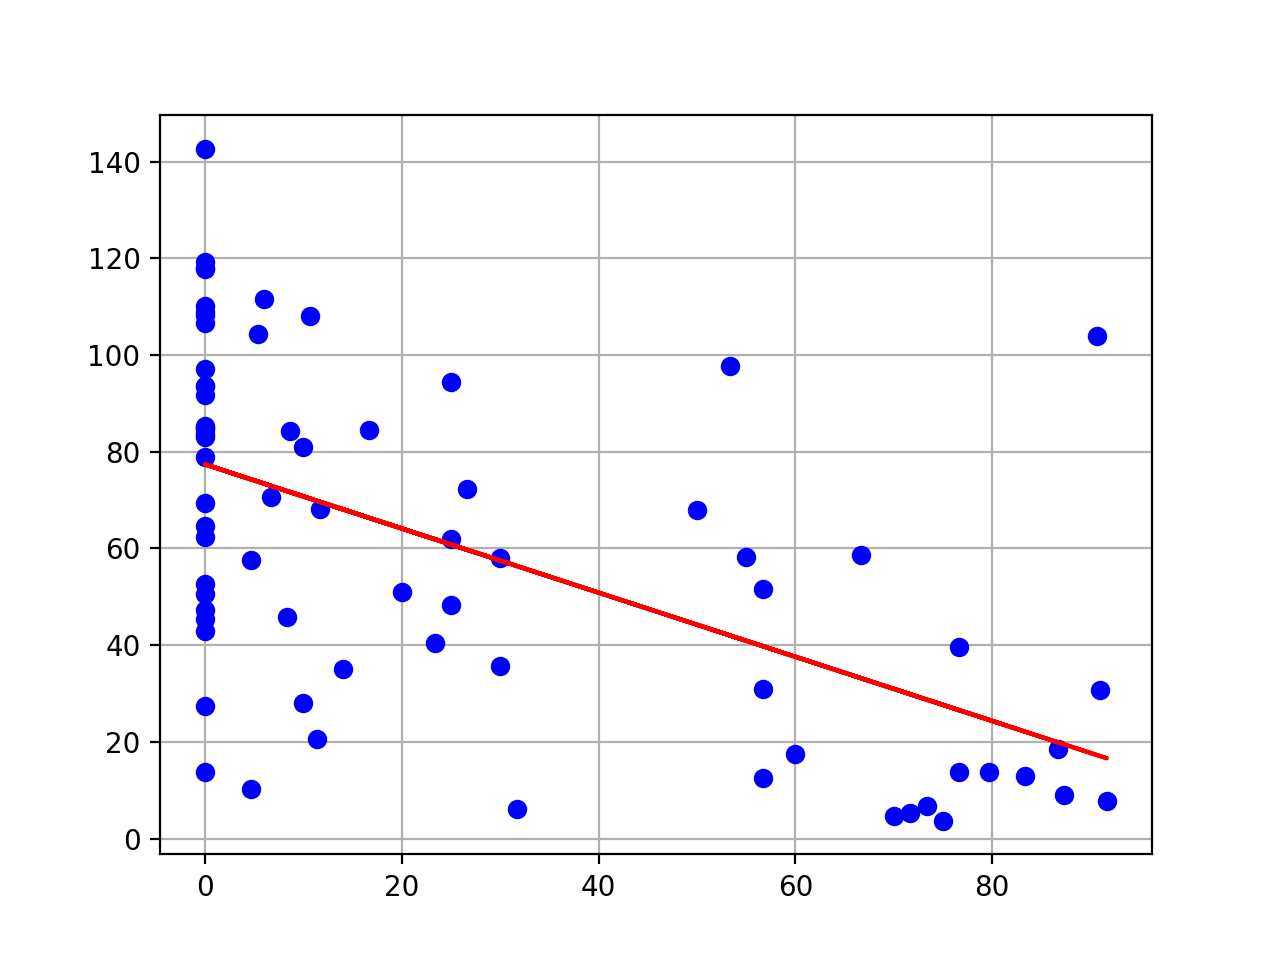

-0.6632714106064153 77.39278643717256


In [96]:
a, b = np.polyfit(X, Y, 1)
Y1 = a * X + b
plt.plot(X, Y, 'bo')
plt.plot(X, Y1, 'r-')

plt.grid()
plt.show()
print(a,b)

In [110]:
from scipy.spatial import distance
# Convert the distances matrix to a DataFrame for better visualization
distances_mat = pd.DataFrame(distances)

distances_mat
plants_only=mean_df.drop(labels=["liigirikkus","pH","invadeeritus"], axis=1)

maatriks_viis= pd.ExcelFile('maatriks_viis.xlsx')
maatriks_viis= maatriks_viis.parse('Sheet5')
#maatriks_viis= maatriks_viis.iloc[1:,1]
print(maatriks_viis)

maatriks= pd.ExcelFile('maatriks.xlsx')
YSI= maatriks.parse('Sheet4')

print(YSI)


                    sample    average
0      Reynoutria_japonica  14.712963
1      Solidago_canadensis  11.314815
2    Aegopodium_podagraria  25.768519
3     Ranunculus_auricomus   0.152778
4     Alopecurus_pratensis   1.604167
..                     ...        ...
216    Agrimonia_eupatoria   0.004630
217         Plantago_media   0.004630
218       Sonchus_arvensis   0.004630
219       Prunus_domestica   0.004630
220             Salix_alba   0.013889

[221 rows x 2 columns]
                      liik  invasiivsus
0      Reynoutria_japonica            1
1      Solidago_canadensis            1
2    Aegopodium_podagraria            0
3     Ranunculus_auricomus            0
4     Alopecurus_pratensis            0
..                     ...          ...
216    Agrimonia_eupatoria            0
217         Plantago_media            0
218       Sonchus_arvensis            0
219       Prunus_domestica            0
220             Salix_alba            0

[221 rows x 2 columns]


In [111]:
YSI['invasiivsus'] = YSI['invasiivsus'].apply(lambda x: 0 if x == 1 else 1)

In [112]:
YSI

,liik,invasiivsus
0,Reynoutria_japonica,0
1,Solidago_canadensis,0
2,Aegopodium_podagraria,1
3,Ranunculus_auricomus,1
4,Alopecurus_pratensis,1
...,...,...
216,Agrimonia_eupatoria,1
217,Plantago_media,1
218,Sonchus_arvensis,1
219,Prunus_domestica,1


In [118]:
len(c_ij

221

In [122]:
df_c_ij 

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
distances_mat

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.000000,102.598868,24.088379,124.521417,16.863010,125.939249,81.503408,20.643132,36.628010,117.293909,...,85.861646,95.569783,81.650509,98.988916,69.200393,93.636561,63.276510,93.198265,90.939082,89.383848
1,102.598868,0.000000,90.695155,103.524823,106.945209,106.150574,138.237919,93.111343,79.918535,95.698891,...,74.370506,61.037784,64.680840,70.824117,62.553533,61.742746,61.271255,66.091267,95.548998,56.254876
2,24.088379,90.695155,0.000000,112.992625,20.207259,116.720940,101.602165,5.744563,18.697148,107.265248,...,85.030550,80.259302,74.961472,84.301707,60.929832,77.947276,49.843087,84.225227,97.183103,72.910143
3,124.521417,103.524823,112.992625,0.000000,126.660965,15.151091,160.698130,115.265394,104.761236,118.358448,...,106.782619,65.345237,97.746270,91.896681,95.272708,64.831405,92.495646,65.970532,124.596683,76.401716
4,16.863010,106.945209,20.207259,126.660965,0.000000,129.718070,97.136788,17.146428,36.762375,121.283186,...,98.543702,98.536513,91.061640,101.852835,77.675250,96.664943,68.494931,100.989548,106.104770,92.635486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,93.636561,61.742746,77.947276,64.831405,96.664943,69.539757,138.152492,80.921773,65.090749,84.556030,...,68.007965,23.414146,52.995807,48.491695,48.657533,0.000000,43.582616,36.269056,93.746111,21.758779
68,63.276510,61.271255,49.843087,92.495646,68.494931,95.147254,109.331301,53.114133,37.890559,83.696210,...,50.425688,47.580341,37.360109,54.113050,24.260164,43.582616,0.000000,45.995169,73.019023,33.349996
69,93.198265,66.091267,84.225227,65.970532,100.989548,64.755094,118.845371,86.524242,72.493103,86.923657,...,45.550643,39.568506,40.398020,58.983990,41.048752,36.269056,45.995169,0.000000,68.574372,37.196177
70,90.939082,95.548998,97.183103,124.596683,106.104770,119.149299,67.539289,97.589845,91.410095,110.377383,...,28.897808,95.678280,55.098901,99.077972,59.186147,93.746111,73.019023,68.574372,0.000000,89.028085


In [136]:
plants_only

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
Reynoutria_japonica,86.666667,0.000000,71.666667,0.000000,91.666667,0.000000,90.666667,75.000000,56.666667,0.0,...,11.666667,0.000000,10.000000,0.000000,20.000000,0.0,25.000000,0.000000,25.0,0.000000
Solidago_canadensis,0.000000,0.000000,0.000000,87.333333,0.000000,91.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,26.666667,0.000000,6.666667,0.000000,25.0,0.000000,30.000000,0.0,11.333333
Aegopodium_podagraria,18.333333,10.666667,0.000000,0.000000,2.666667,12.666667,99.666667,1.333333,0.000000,12.0,...,60.000000,0.000000,36.666667,0.000000,28.333333,0.0,13.333333,30.000000,85.0,0.666667
Ranunculus_auricomus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.666667,0.0,0.000000
Alopecurus_pratensis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,2.000000,1.000000,8.333333,0.000000,0.0,0.000000,0.333333,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Agrimonia_eupatoria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333
Plantago_media,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333
Sonchus_arvensis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Prunus_domestica,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [145]:
plants_only

sample,INV-1-R,INV-1-S,INV-10-R,INV-10-S,INV-11-R,INV-11-S,INV-12-R,INV-13-R,INV-2-R,INV-2-S,...,TRANS-5-R,TRANS-5-S,TRANS-6-R,TRANS-6-S,TRANS-7-R,TRANS-7-S,TRANS-8-R,TRANS-8-S,TRANS-9-R,TRANS-9-S
Reynoutria_japonica,86.666667,0.000000,71.666667,0.000000,91.666667,0.000000,90.666667,75.000000,56.666667,0.0,...,11.666667,0.000000,10.000000,0.000000,20.000000,0.0,25.000000,0.000000,25.0,0.000000
Solidago_canadensis,0.000000,0.000000,0.000000,87.333333,0.000000,91.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,26.666667,0.000000,6.666667,0.000000,25.0,0.000000,30.000000,0.0,11.333333
Aegopodium_podagraria,18.333333,10.666667,0.000000,0.000000,2.666667,12.666667,99.666667,1.333333,0.000000,12.0,...,60.000000,0.000000,36.666667,0.000000,28.333333,0.0,13.333333,30.000000,85.0,0.666667
Ranunculus_auricomus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.666667,0.0,0.000000
Alopecurus_pratensis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,2.000000,1.000000,8.333333,0.000000,0.0,0.000000,0.333333,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Agrimonia_eupatoria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333
Plantago_media,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333
Sonchus_arvensis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Prunus_domestica,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [ ]:
mean_df=mean_df.T
distances = pairwise_distances(mean_df.values)

# Convert the distances matrix to a DataFrame for better visualization
distances_df = pd.DataFrame(distances, index=mean_df.index, columns=mean_df.index)
distances_df

In [151]:
distances_mat

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0.000000,346.204821,369.203873,258.349247,265.276219,272.976546,258.606576,264.439922,258.610872,258.198944,...,258.599003,258.599218,258.599863,258.599433,258.641751,258.599003,258.599003,258.502310,258.480818,258.567206
1,346.204821,0.000000,415.275478,229.077619,232.309480,246.748804,229.529531,227.967164,230.239308,228.543273,...,230.183743,230.167572,229.953860,230.052409,230.198948,230.167330,230.167330,230.183743,230.183743,230.185674
2,369.203873,415.275478,0.000000,356.121156,358.530450,366.449671,356.637343,358.478072,356.179847,354.082814,...,356.700076,356.699609,356.698830,356.614093,356.647585,356.704437,356.704437,356.703814,356.702568,356.537126
3,258.349247,229.077619,356.121156,0.000000,58.420173,96.489925,5.367081,55.626982,4.536886,14.780806,...,4.346135,4.358899,4.396969,4.371626,6.403124,4.346135,4.346135,4.346135,4.346135,4.447221
4,265.276219,232.309480,358.530450,58.420173,0.000000,113.091163,59.445119,79.650277,57.290197,58.344285,...,59.511203,59.508403,59.507469,59.507469,59.637097,59.507469,59.507469,59.511203,59.511203,59.518671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,258.599003,230.167330,356.704437,4.346135,59.507469,96.564170,3.452053,55.477974,5.079917,14.799587,...,0.471405,0.333333,0.816497,0.471405,4.678556,0.000000,0.000000,0.471405,0.471405,1.054093
217,258.599003,230.167330,356.704437,4.346135,59.507469,96.564170,3.452053,55.477974,5.079917,14.799587,...,0.471405,0.333333,0.816497,0.471405,4.678556,0.000000,0.000000,0.471405,0.471405,1.054093
218,258.502310,230.183743,356.703814,4.346135,59.511203,96.564170,3.452053,55.487987,5.079917,14.807093,...,0.471405,0.577350,0.816497,0.666667,4.725816,0.471405,0.471405,0.000000,0.471405,1.054093
219,258.480818,230.183743,356.702568,4.346135,59.511203,96.564170,3.452053,55.487987,5.079917,14.814595,...,0.471405,0.577350,0.816497,0.666667,4.725816,0.471405,0.471405,0.471405,0.000000,1.054093


In [148]:
len(distance)

221

In [152]:
com=plants_only
com = np.array(com).T
com = com / np.sum(com, axis=1)[:, np.newaxis]
#plants_only=plants_only.T
distance = pairwise_distances(plants_only.values)

rpi = pd.DataFrame(YSI) #/ np.max(YSI, axis=0)

distances_mat = pd.DataFrame(distance)
#t_dist=np.reshape(distances_mat.values,(1,-1))
#cij = 1 - (pairwise_distances(np.reshape(rpi.values,(1, -1)), metric="correlation"))
t_dist=np.reshape(distances_mat.values,(1,-1))
#cij = 1 - (pairwise_distances(rpi, metric="correlation"))
r = YSI['invasiivsus'].values
n = len(r)
c_ij = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        #if i != j:
        c_ij[i, j] = 1 - min(r[i], r[j])

# Convert the resulting matrix to a DataFrame if needed
df_c_ij = pd.DataFrame(c_ij)

dxc = distances_mat *c_ij

BNI=np.cross(com,dxc)
BNI = np.apply_along_axis(lambda x: np.dot(x, np.dot(dxc, x)), axis=1, arr=com) / 2
#RaoQ = np.apply_along_axis(lambda x: np.dot(x, np.dot(t_dist, x)), axis=1, arr=com) / 2
#BNIs = BNI / RaoQ

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [153]:
com.shape

(72, 221)

In [130]:
t_dist.shape

(1, 5184)